<a href="https://colab.research.google.com/github/amdihsann/laptop-price-prediction/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##**Laptop Price Prediction: A Machine Learning Approach**
---
##Project Overview:
This notebook documents the end-to-end process of developing a machine learning model to predict laptop prices. The primary goal is to provide a data-driven tool for consumers, especially students, to estimate a laptop's cost based on its specifications, thus simplifying their purchasing decisions.

##Workflow:
The project covers key stages of the data science pipeline:


1.   Data Cleaning & Preparation <br>
Handling outliers and preparing the dataset.
2.   Exploratory Data Analysis (EDA)<br>
Visualizing data to uncover insights and correlations.
3. Feature Engineering<br>
Creating new features to improve model performance.
4. Modeling & Evaluation<br>
Building and comparing several regression models (Linear Regression, Decision Tree, and Random Forest) to find the best performer.


##Final Result:
The final Random Forest model successfully predicts laptop prices with an R-squared (R²) score of 0.90.

## **IMPORT LIBRARIES**

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## **LOAD DATASET**

In [114]:
url = "https://github.com/amdihsann/Dataset-/raw/refs/heads/main/Regression_laptop_price/laptop_price.csv"

df = pd.read_csv(url, encoding='latin-1')


In [115]:
# Show top 5 data
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [116]:
# See 'Memory' column for inspection
print(df['Memory'])

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object


In [117]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [118]:
# Descriptive statistics
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [119]:
# Check the number of missing values
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [120]:
# check duplicate data
duplicate_rows = df.duplicated().sum()
print("Jumlah duplikat:", duplicate_rows)

Jumlah duplikat: 0


## **DATA CLEANING**

In [121]:
# Clean the Ram column from GB units
df['Ram'] = df['Ram'].apply(lambda x: int(x.replace('GB', '')) if isinstance(x, str) else x)

# Clear the Weight column from kg units
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace('kg', '')) if isinstance(x, str) else x)

# Show cleared columns
print(df[['Ram', 'Weight']].head())

   Ram  Weight
0    8    1.37
1    8    1.34
2    8    1.86
3   16    1.83
4    8    1.37


In [122]:
# Double check the data info that has been cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


# **EDA ( EXPLORATORY DATA ANALYSIS )**

In [123]:
# take all numeric columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Features:", numerical_features)

# take all categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Features:", categorical_cols)

Numeric Features: ['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros']
Categorical Features: ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']


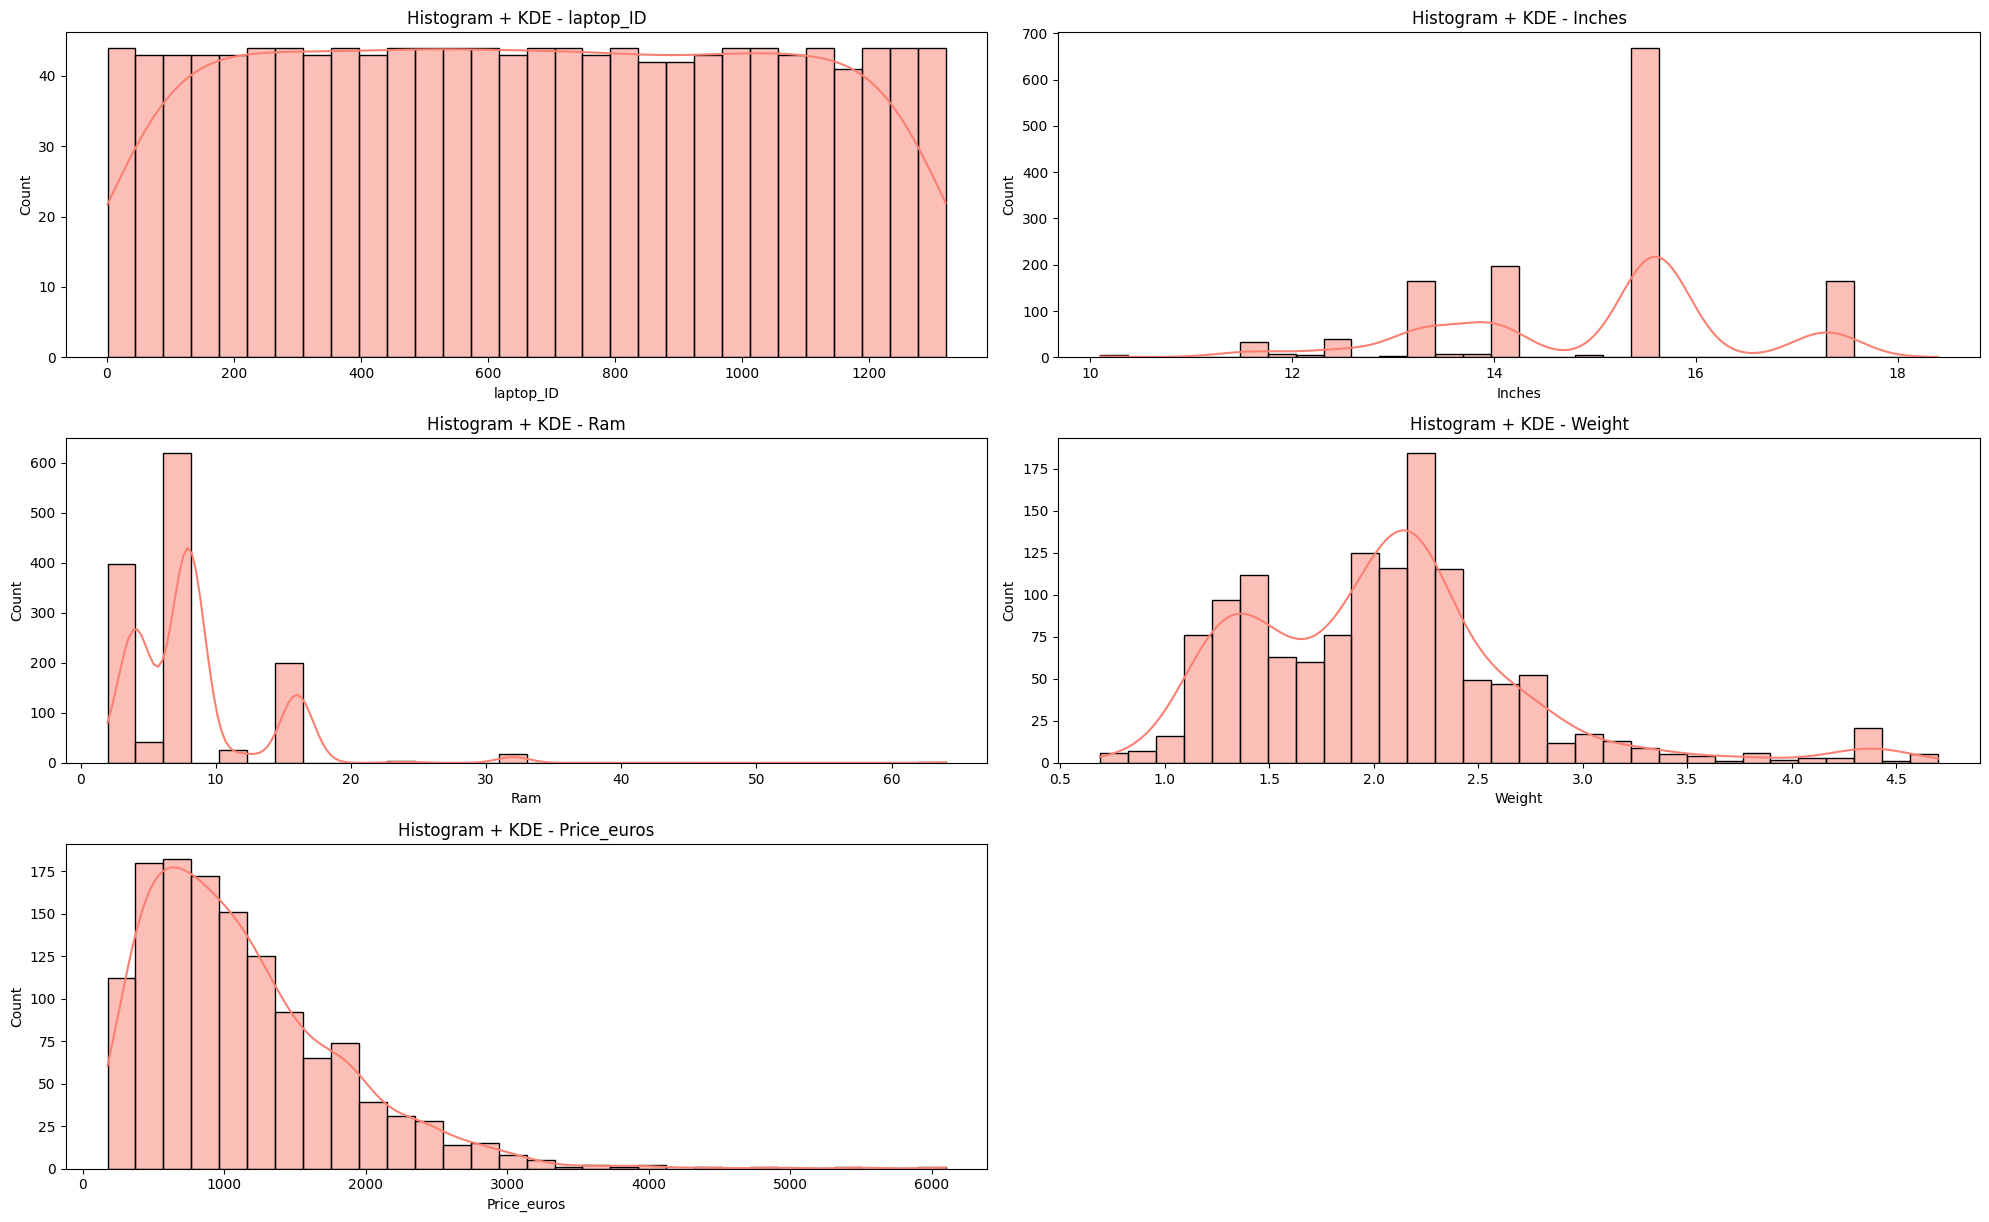

In [124]:
# Univariate Analysis for Numerical Features
plt.figure(figsize=(20, len(numerical_features) * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 2, i + 1)
    sns.histplot(df[col], kde=True, color='salmon', bins=30)
    plt.title(f'Histogram + KDE - {col}')
plt.tight_layout()
plt.show()


It can be concluded that several laptop characteristics are closely related to price segmentation. Laptops with higher specifications, such as larger screen sizes, more RAM capacity, lighter weight, and the use of large-capacity SSD storage, tend to have higher prices. Conversely, laptops with standard specifications, such as less RAM, traditional HDDs, or higher weight, are more commonly found in the lower price category. This pattern reflects how laptop features influence the perceived value of the product.

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


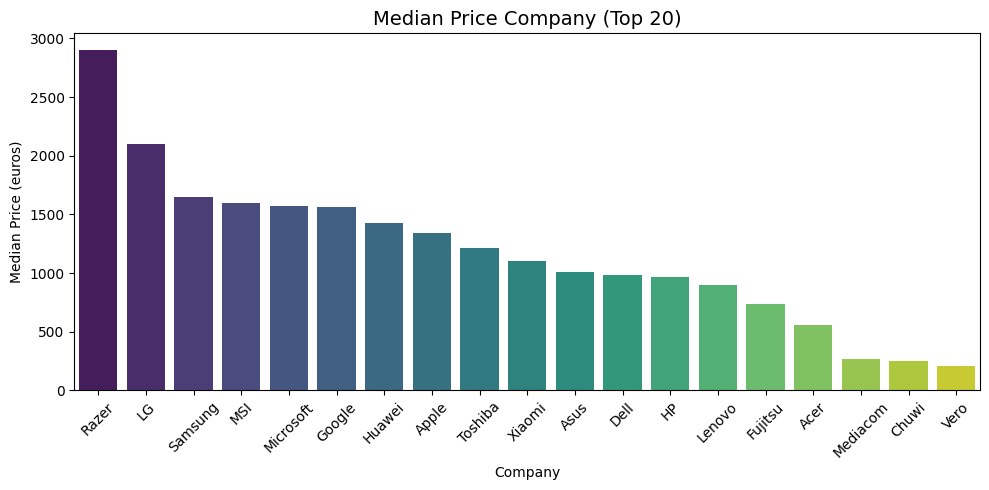

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


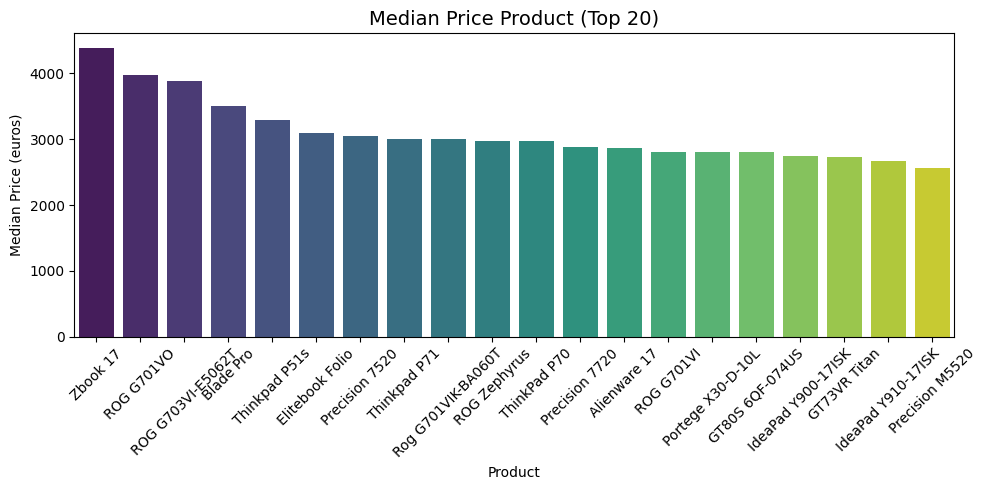

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


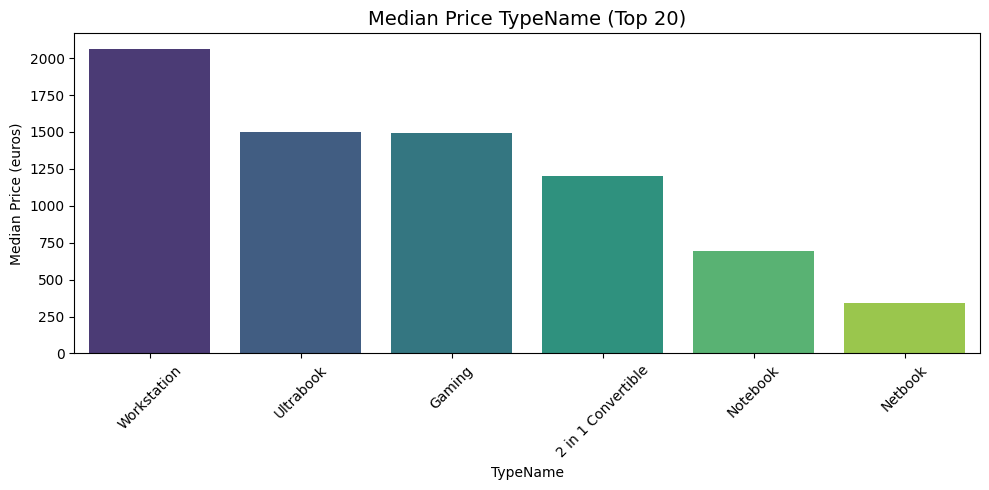

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


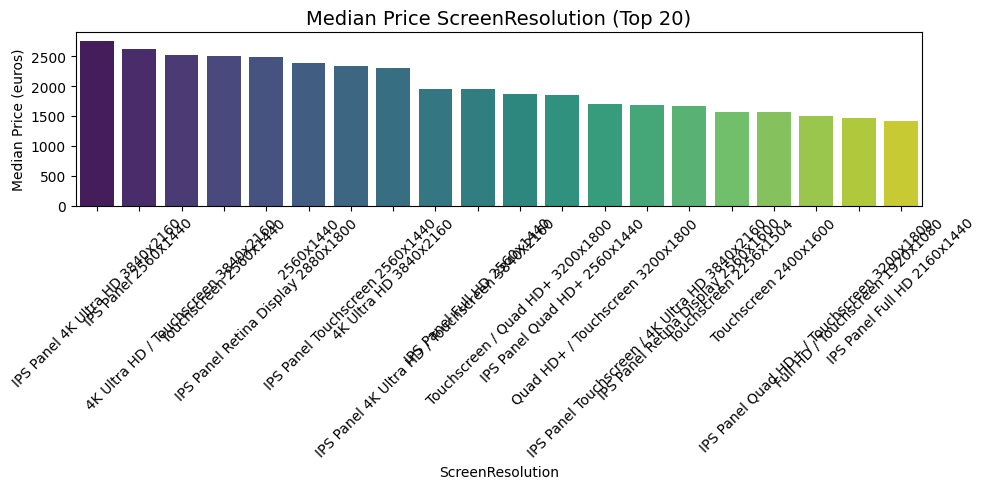

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


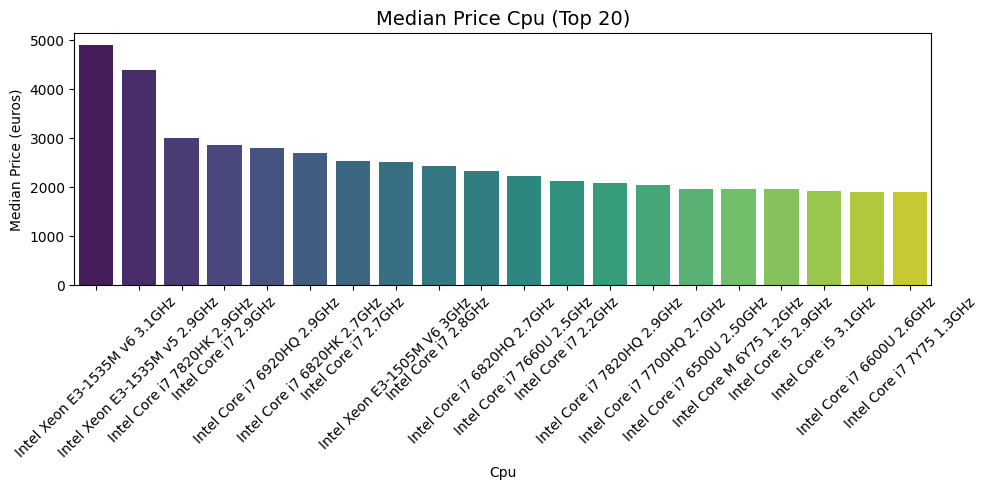

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


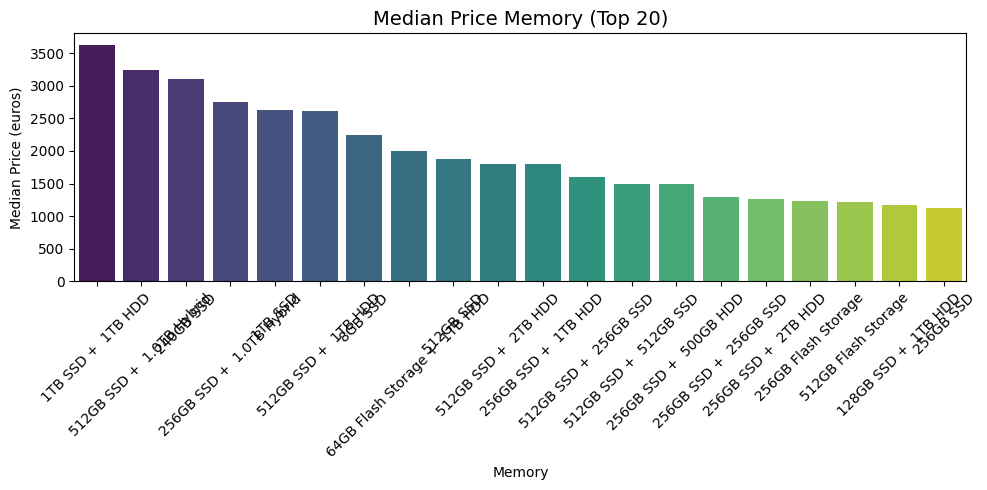

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


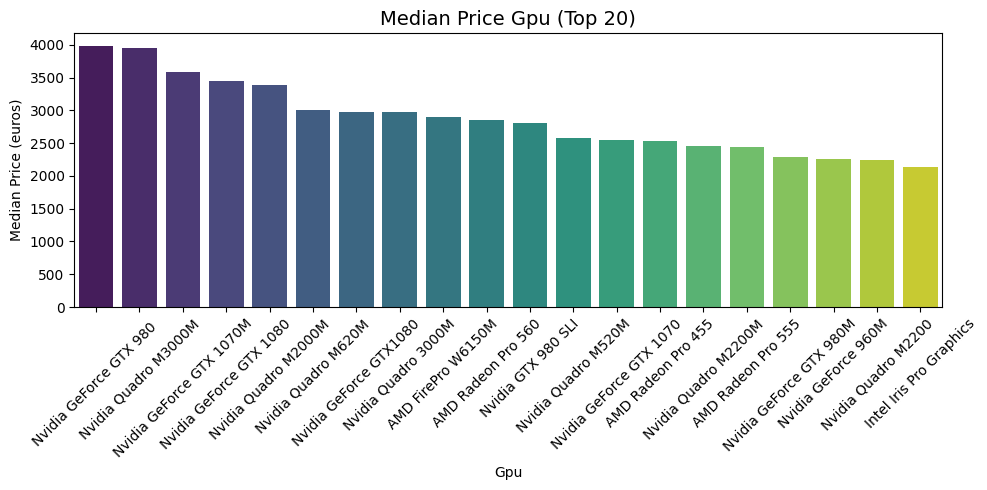

/tmp/ipython-input-302956385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


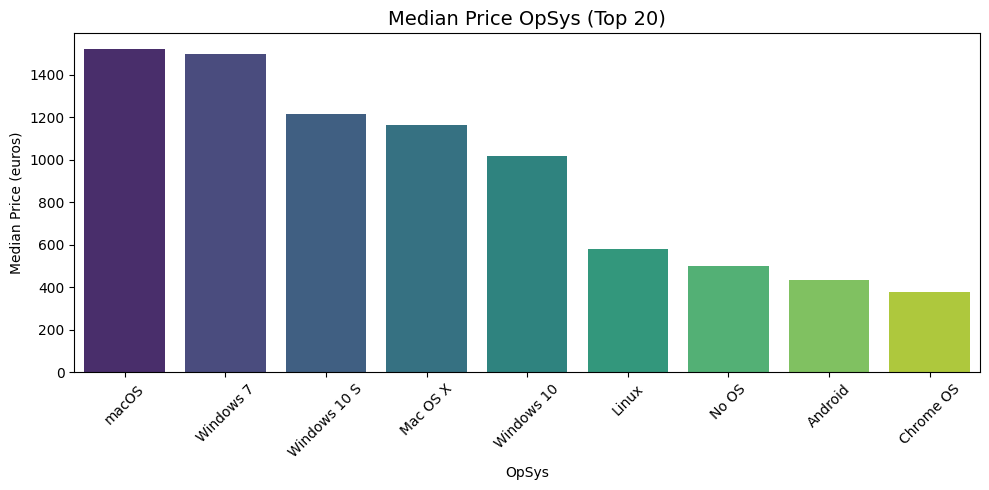

/tmp/ipython-input-302956385.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')
/tmp/ipython-input-302956385.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')
/tmp/ipython-input-302956385.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')
/tmp/ipython-input-302956385.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

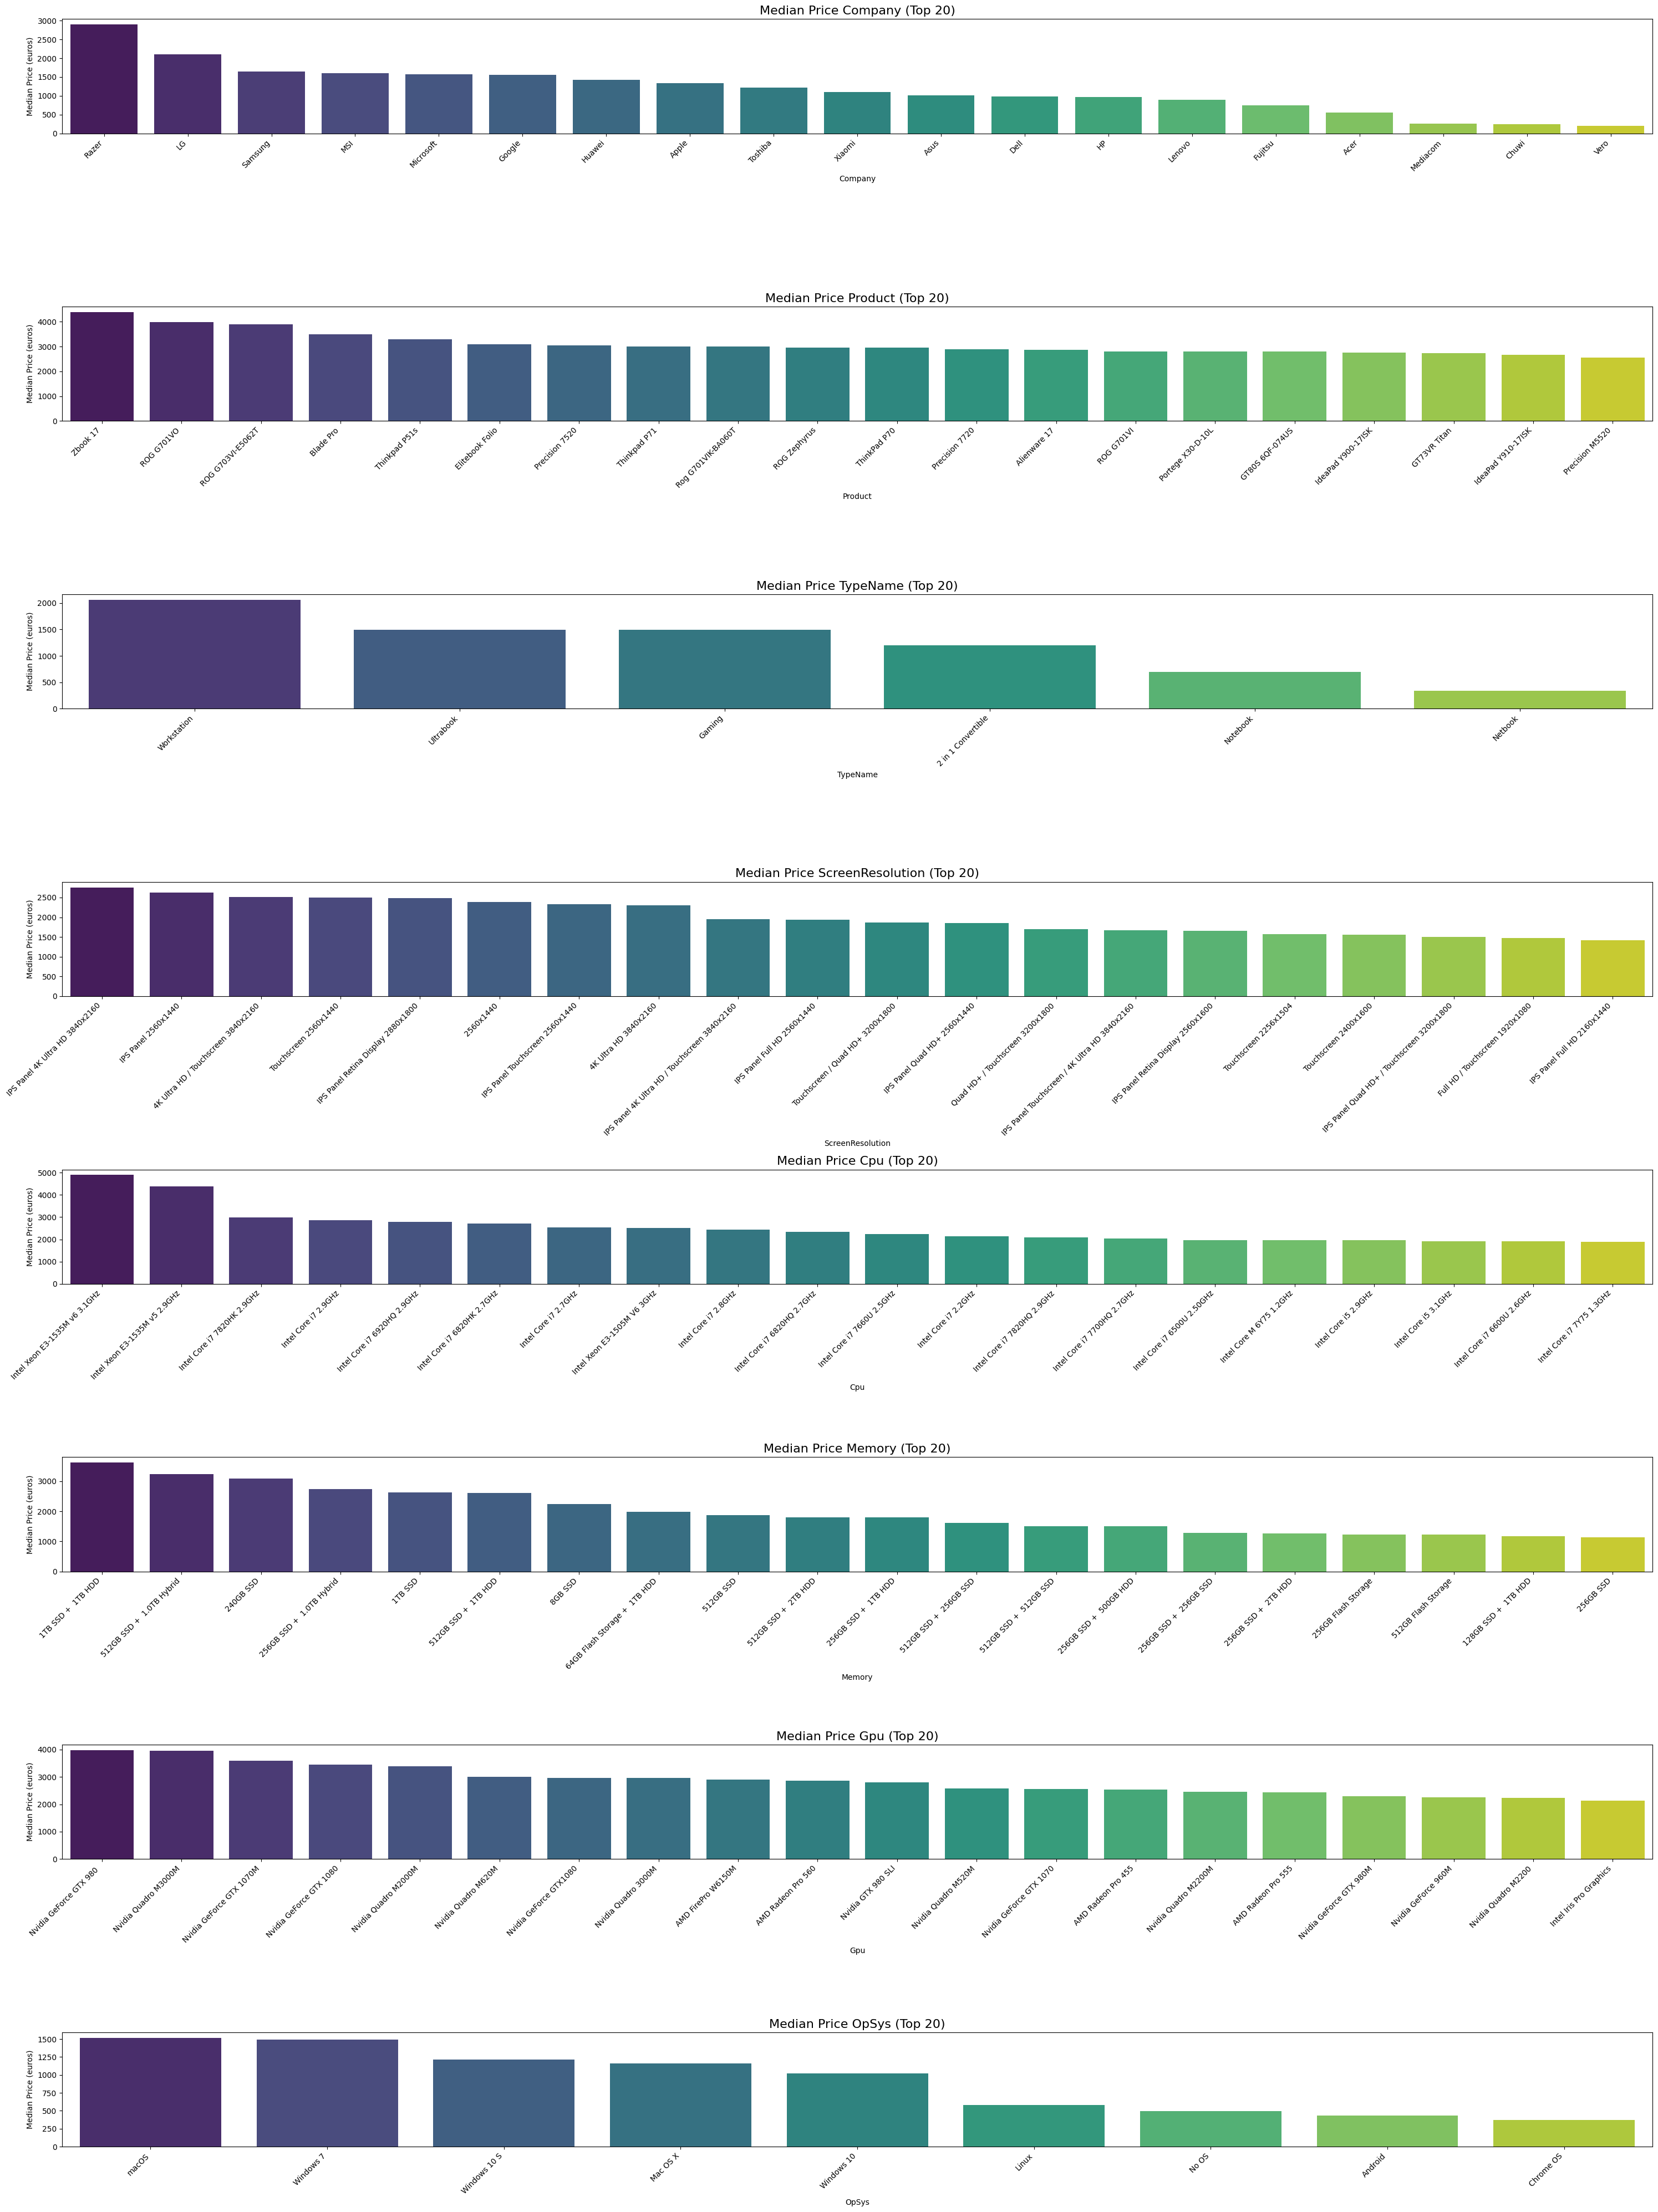

In [125]:
# Univariate Analysis for Categorical Features
top_n = 20

for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    median_price = df.groupby(col)['Price_euros'].median().sort_values(ascending=False).head(top_n)

    sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')
    plt.title(f'Median Price {col} (Top {top_n})', fontsize=14)
    plt.ylabel('Median Price (euros)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# if you want a bigger graph
plt.figure(figsize=(30, len(categorical_cols) * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    median_price = df.groupby(col)['Price_euros'].median().sort_values(ascending=False).head(top_n)

    sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')
    plt.title(f'Median Price {col} (Top {top_n})', fontsize=16)
    plt.ylabel('Median Price (euros)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


Research shows that brand, hardware specifications, and operating system significantly influence price. Premium brands like Apple and Dell, as well as Ultrabooks and gaming laptops, tend to be in the higher price segment.
Laptops with SSDs or hybrid storage, high-end processors (Core i7/i9, Ryzen 7), discrete GPUs, and premium operating systems like macOS or Windows 10 Pro are generally more expensive.
Furthermore, high screen resolutions, such as Full HD or 4K, also push laptop prices into the premium segment.

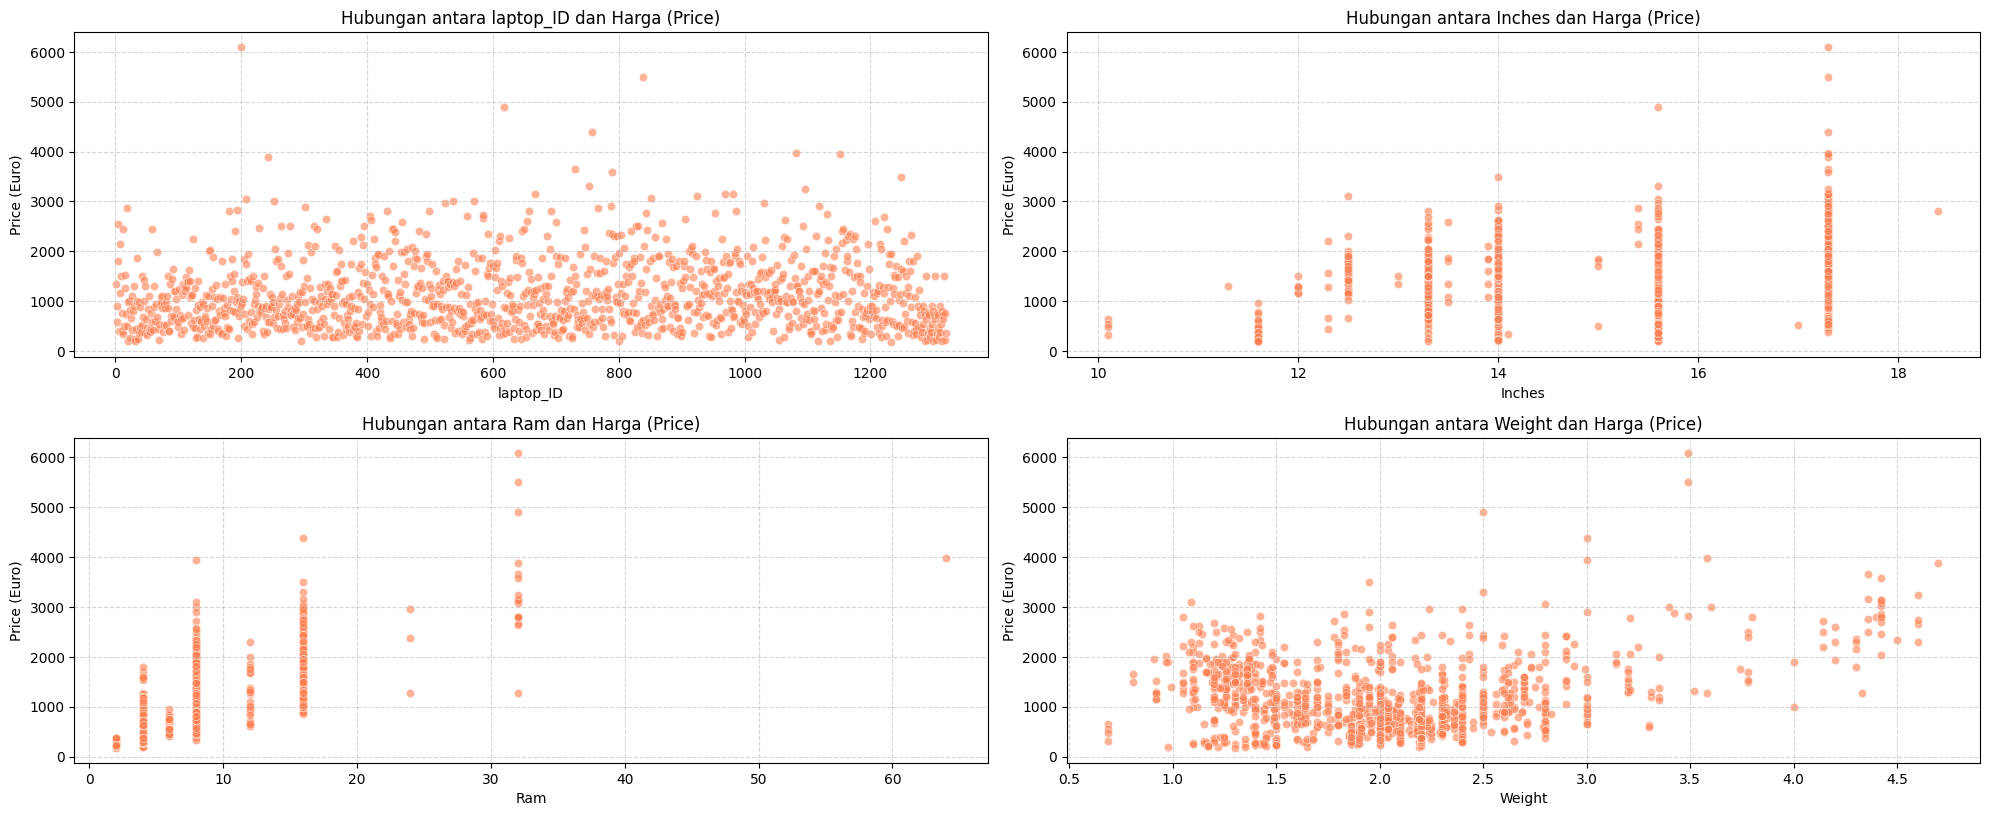

In [126]:
# Bivariate Analysis
# Numerical vs Target (Price) Features
plt.figure(figsize=(20, len(numerical_features) * 4))
for i, col in enumerate(numerical_features):
    if col != 'Price_euros':
        plt.subplot(len(numerical_features), 2, i + 1)
        sns.scatterplot(data=df, x=col, y='Price_euros', color='coral', alpha=0.6)
        plt.title(f'Hubungan antara {col} dan Harga (Price)')
        plt.xlabel(col)
        plt.ylabel('Price (Euro)')
        plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Laptops with larger screens tend to be more expensive, although there are exceptions in the mid-range segment. Higher RAM capacity also correlates with higher prices, especially on mid-range and premium laptops. Laptop weight doesn't always correlate with price, as both lightweight and heavy laptops can be equally expensive depending on the model and needs. The larger the SSD capacity, the higher the price, while laptops with larger HDDs tend to be cheaper, especially on older or entry-level models. High-resolution screens also correlate with higher prices, typically on high-end laptops for design or multimedia needs.

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


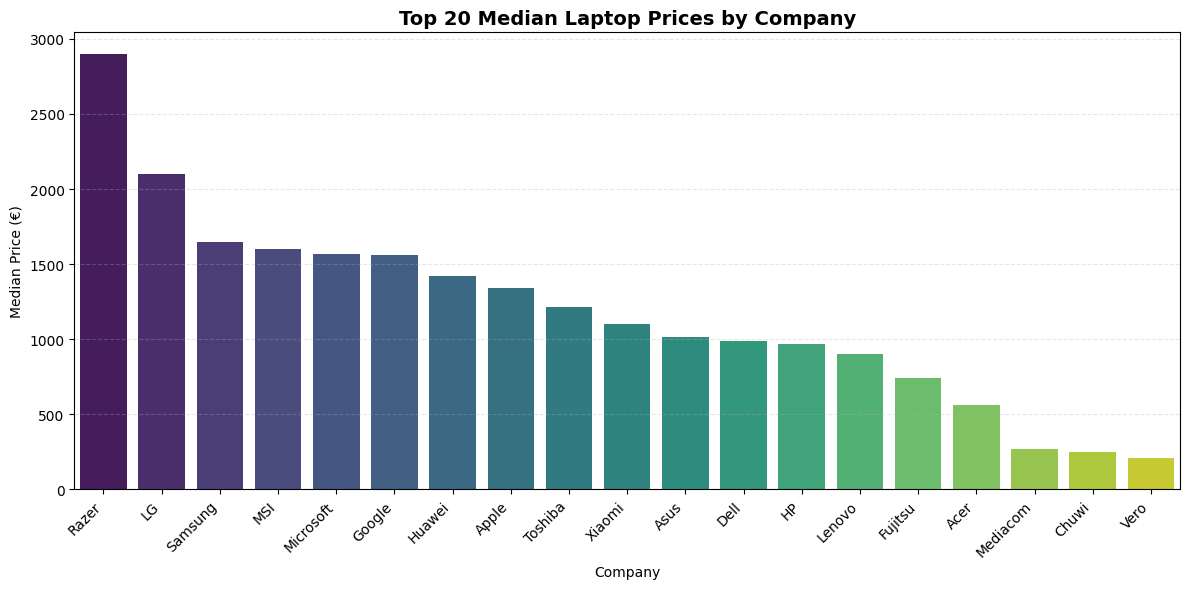

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


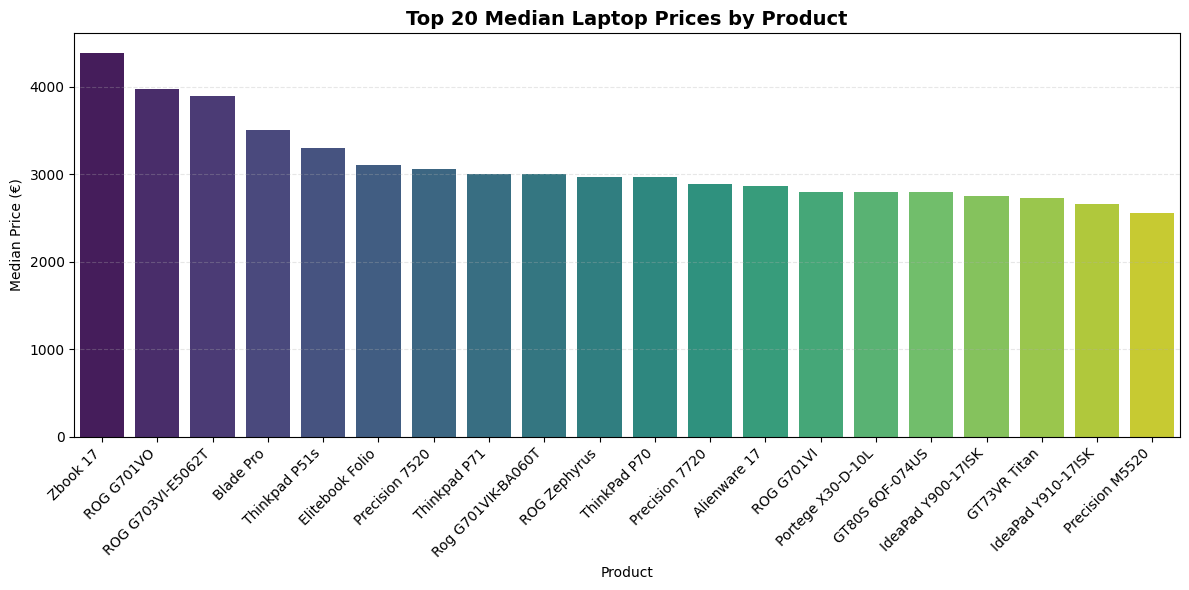

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


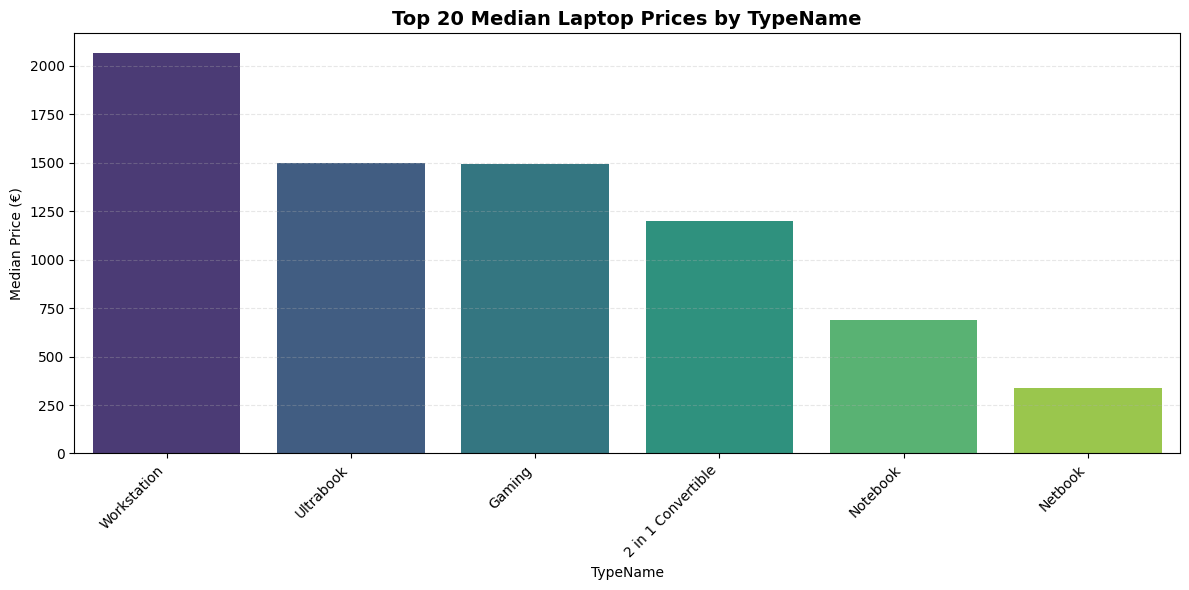

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


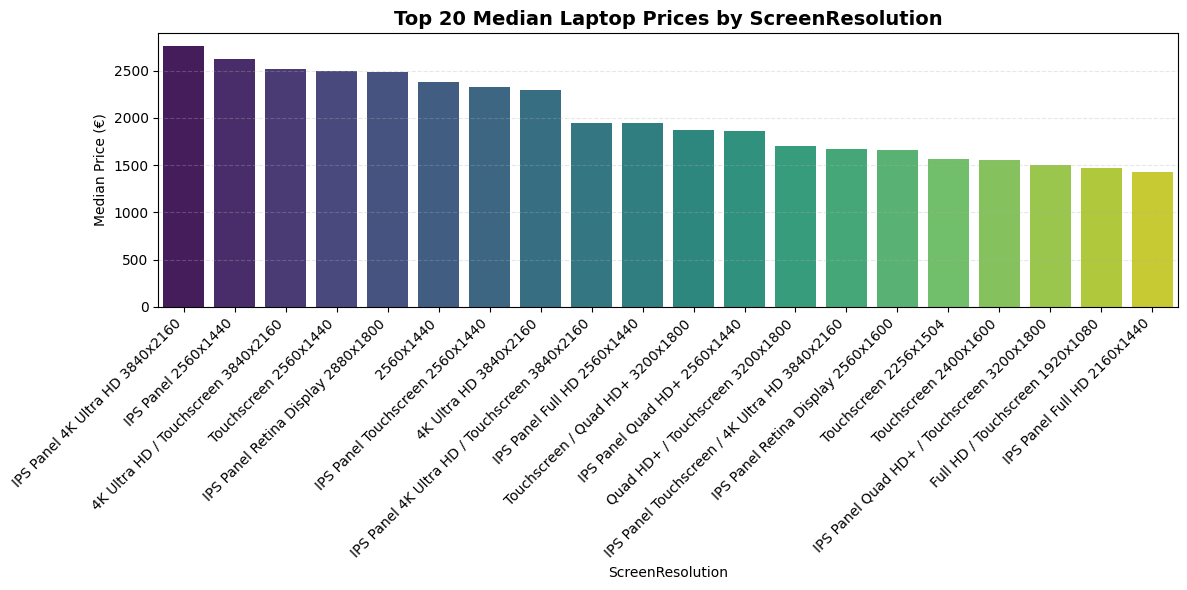

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


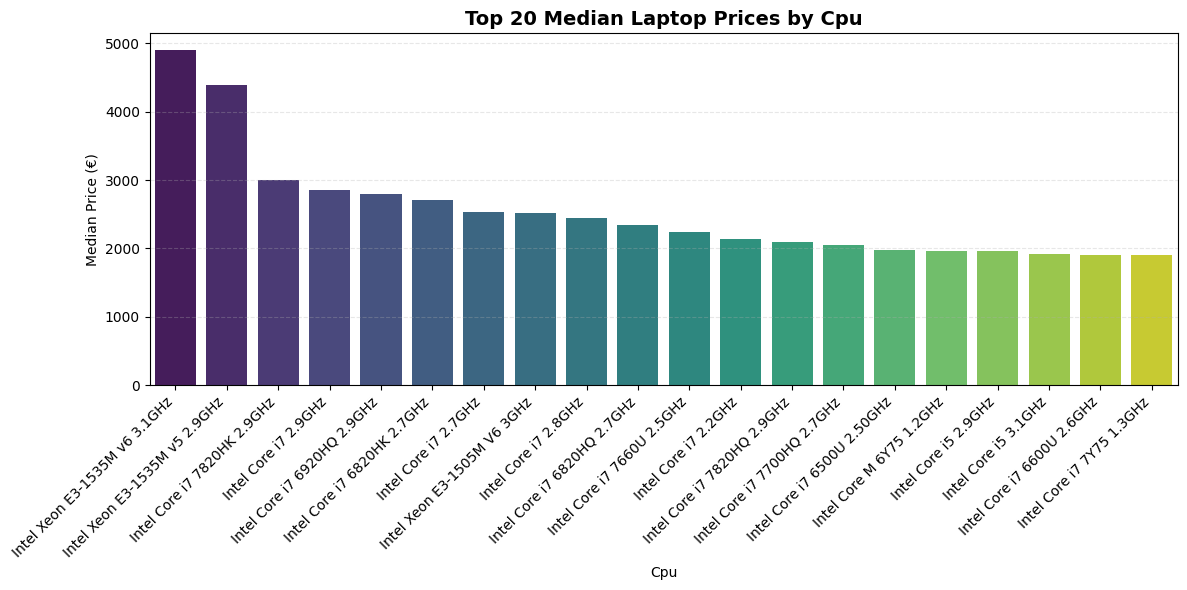

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


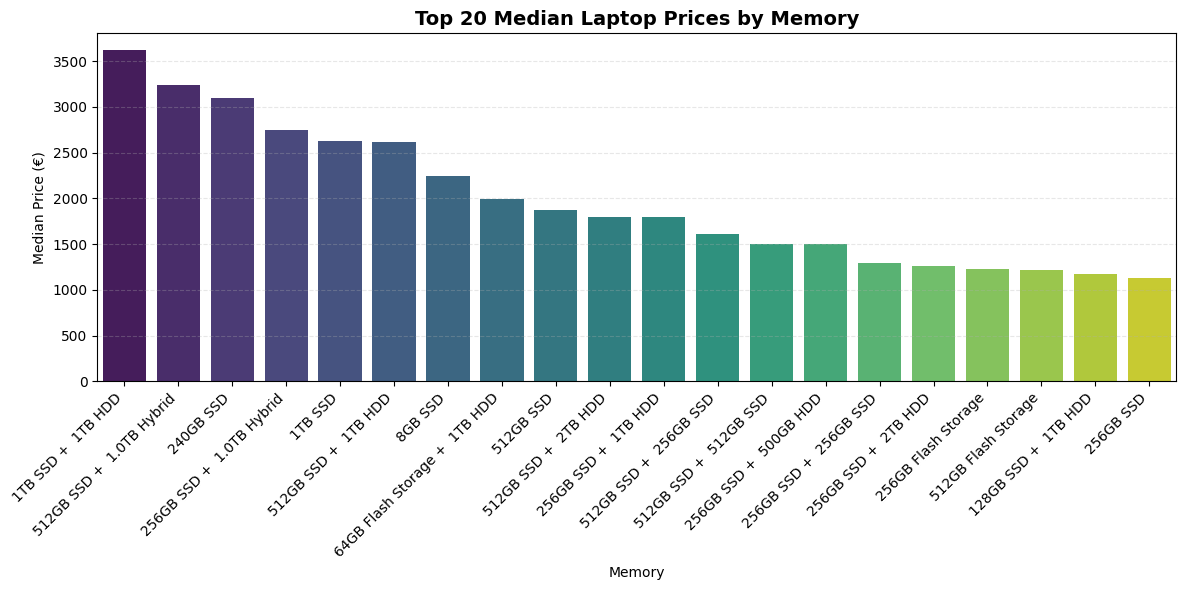

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


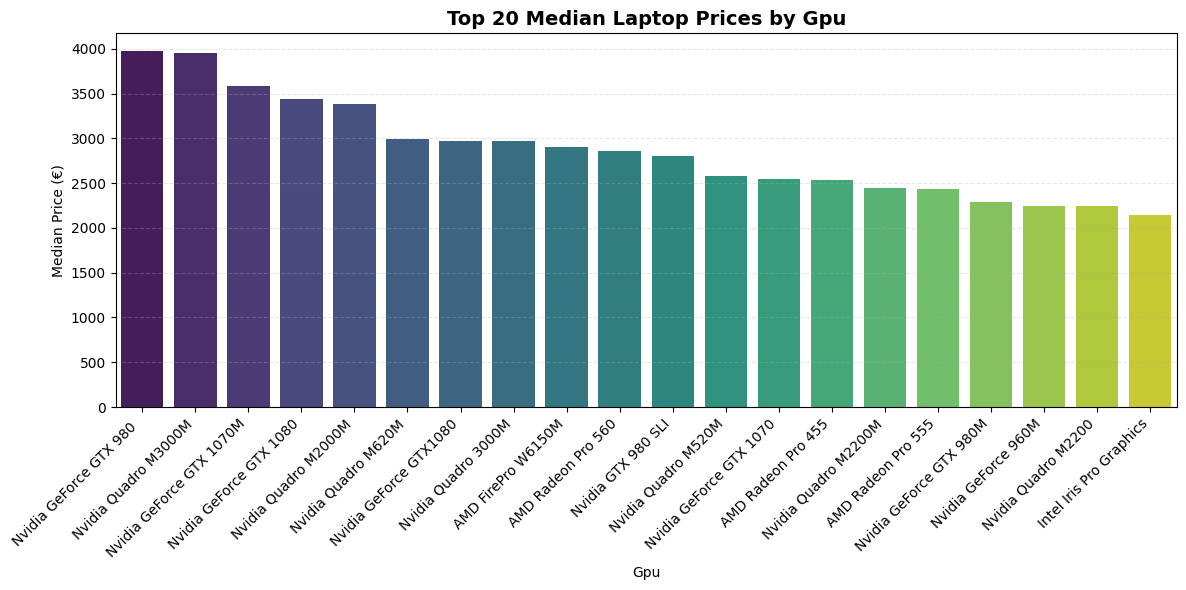

/tmp/ipython-input-3405700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')


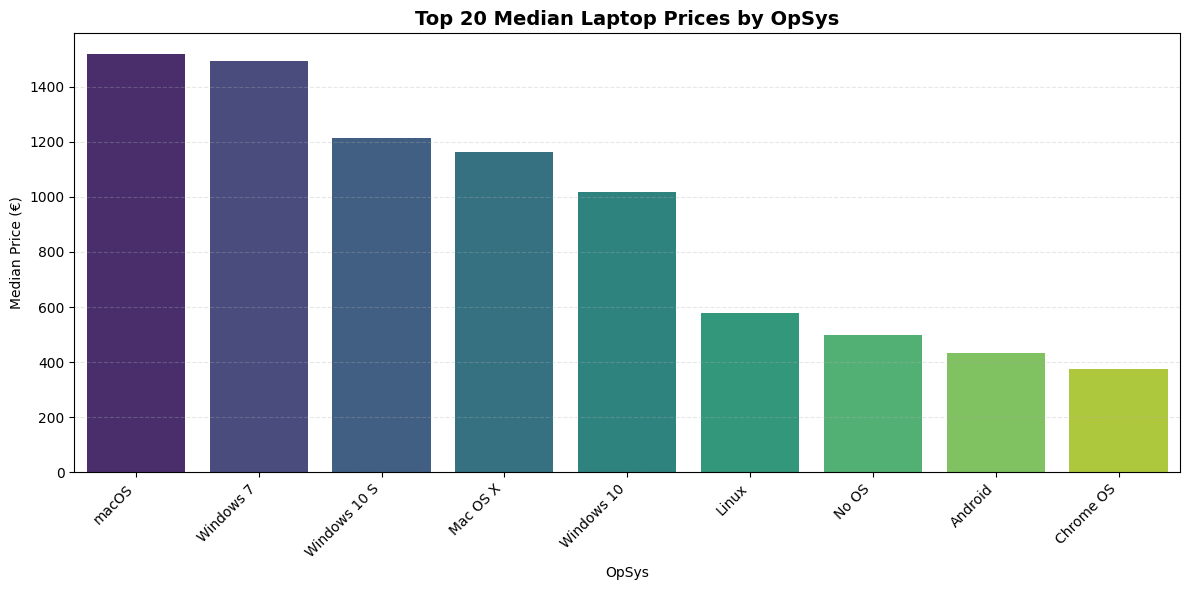

In [127]:
# Bivariate Analysis
# Categorical vs Target Features [median]

top_n = 20

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    median_price = df.groupby(col)['Price_euros'].median().sort_values(ascending=False).head(top_n)

    sns.barplot(x=median_price.index, y=median_price.values, palette='viridis')
    plt.title(f'Top {top_n} Median Laptop Prices by {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Median Price (€)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


Laptop prices are influenced by brand, model, operating system, CPU, GPU, and RAM.
Premium brands (Apple, MSI, Razer), workstation/gaming models, macOS/Windows 10, high-end processors, NVIDIA GPUs, and large amounts of RAM tend to drive up prices.
The analysis uses medians for more stable results and to avoid outlier bias.

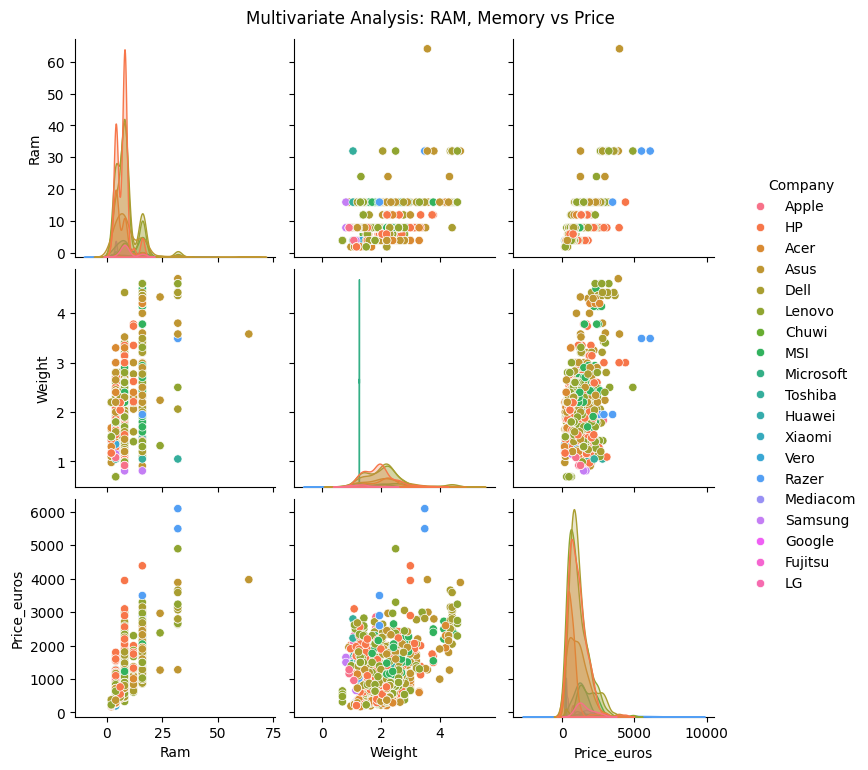

In [128]:
# Multivariate Analysis
# Visualization of the relationship between several features
sns.pairplot(df, vars=['Ram', 'Weight', 'Price_euros'], hue='Company')
plt.suptitle("Multivariate Analysis: RAM, Memory vs Price", y=1.02)
plt.show()

The relationship between RAM, memory, and laptop price shows a significant positive correlation. Laptops with large RAM and memory capacities tend to have higher prices, reflecting their more powerful specifications. Brand also plays a significant role in price, with premium brands like Apple commanding higher prices despite similar specifications to other brands. The visualization shows clusters separating low- and high-priced laptops, as well as outliers. Overall, RAM, memory, and company are the main factors influencing laptop prices.

## **Cek Outlier**

In [129]:
# Outlier Value Analysis of Numerical Features (text only)
print(" Outlier Analysis of Numeric Features (based on IQR):\n")
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_percent = (outlier_count / total_count) * 100

    print(f"Fiture: {col}")
    if outlier_count > 0:
        print(f"Found {outlier_count} outliers ({outlier_percent:.2f}%) base on IQR.")
        print(f"   - lower bound: {lower_bound:.2f}")
        print(f"   - upper bound : {upper_bound:.2f}")
    else:
        print("No significant outliers were found.")
    print("-" * 50)


 Outlier Analysis of Numeric Features (based on IQR):

Fiture: laptop_ID
No significant outliers were found.
--------------------------------------------------
Fiture: Inches
Found 39 outliers (2.99%) base on IQR.
   - lower bound: 11.60
   - upper bound : 18.00
--------------------------------------------------
Fiture: Ram
Found 221 outliers (16.96%) base on IQR.
   - lower bound: -2.00
   - upper bound : 14.00
--------------------------------------------------
Fiture: Weight
Found 46 outliers (3.53%) base on IQR.
   - lower bound: 0.30
   - upper bound : 3.50
--------------------------------------------------
Fiture: Price_euros
Found 29 outliers (2.23%) base on IQR.
   - lower bound: -734.32
   - upper bound : 2821.20
--------------------------------------------------


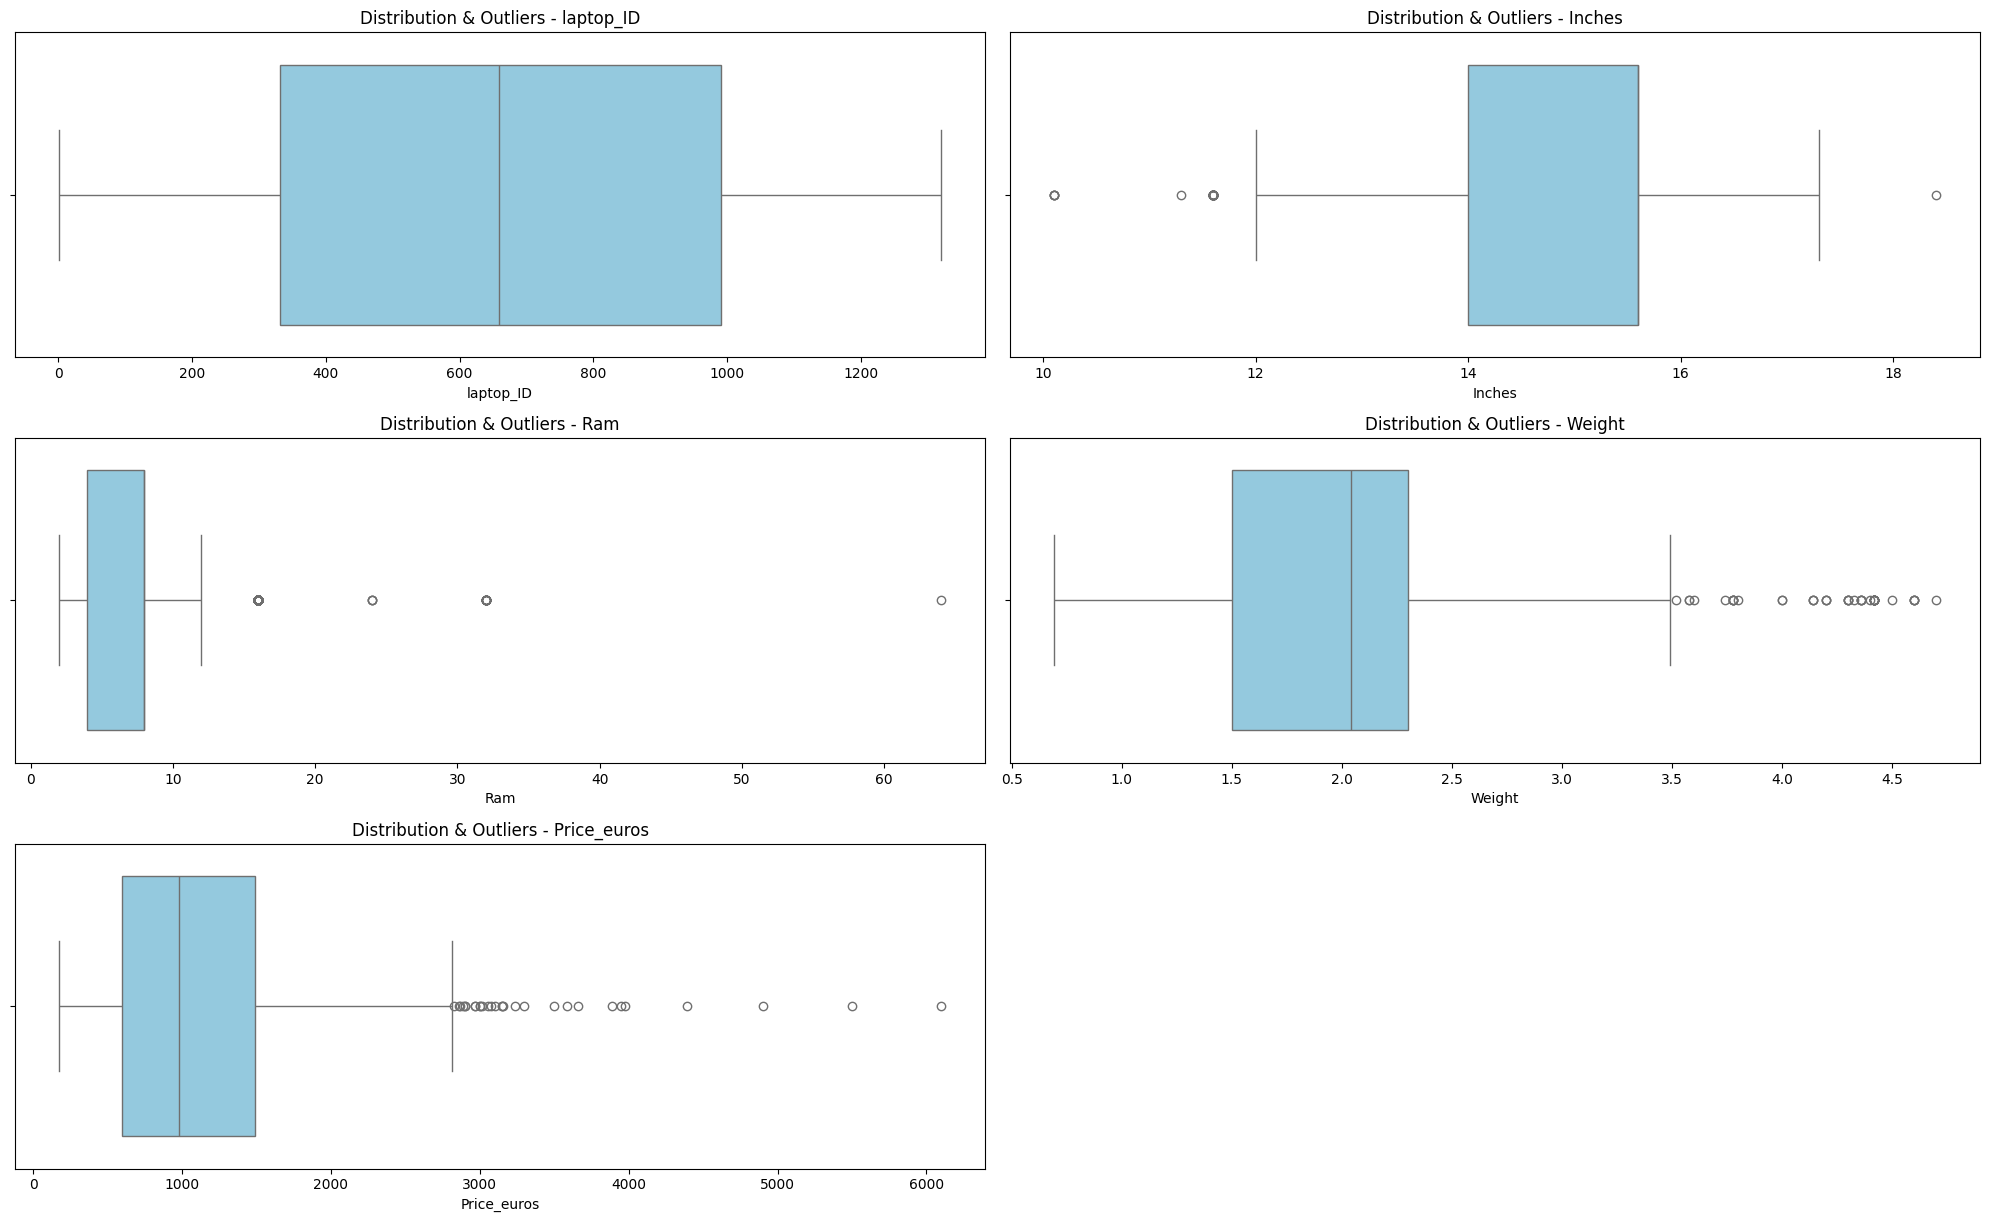

In [130]:
# Outlier Value Analysis of Numerical Features (graphic form)

plt.figure(figsize=(20, len(numerical_features) * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Distribution & Outliers - {col}')
plt.tight_layout()
plt.show()



In [131]:
# Categorical Feature Analysis (text only)
# Check Category Frequency (check which values ​​rarely appear, if in numerical terms they can be called outliers)

for col in categorical_cols:
    print(f"Feture: {col}")
    freq = df[col].value_counts()

    # Show low frequency categories (< 5)
    low_freq = freq[freq < 5]
    if not low_freq.empty:
        print("Low frequency categories (possible outliers or rare data)")
        print(low_freq)
    else:
        print("There are no low frequency categories.")
    print("-" * 50)


Feture: Company
Low frequency categories (possible outliers or rare data)
Company
Vero       4
Xiaomi     4
Chuwi      3
Fujitsu    3
Google     3
LG         3
Huawei     2
Name: count, dtype: int64
--------------------------------------------------
Feture: Product
Low frequency categories (possible outliers or rare data)
Product
Aspire A515-51G                          4
Yoga Book                                4
Aspire 7                                 4
VivoBook Max                             4
Latitude 7480                            4
                                        ..
ThinkPad L460                            1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No    1
Rog GL502VS                              1
Rog GL553VE-FY052T                       1
17-ak001nv (A6-9220/4GB/500GB/Radeon     1
Name: count, Length: 558, dtype: int64
--------------------------------------------------
Feture: TypeName
There are no low frequency categories.
-------------------------------------------------

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


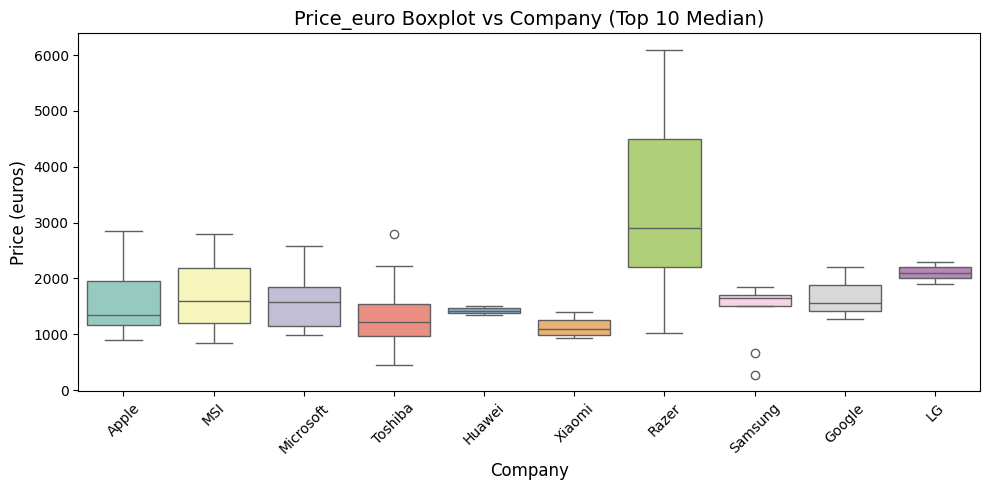

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


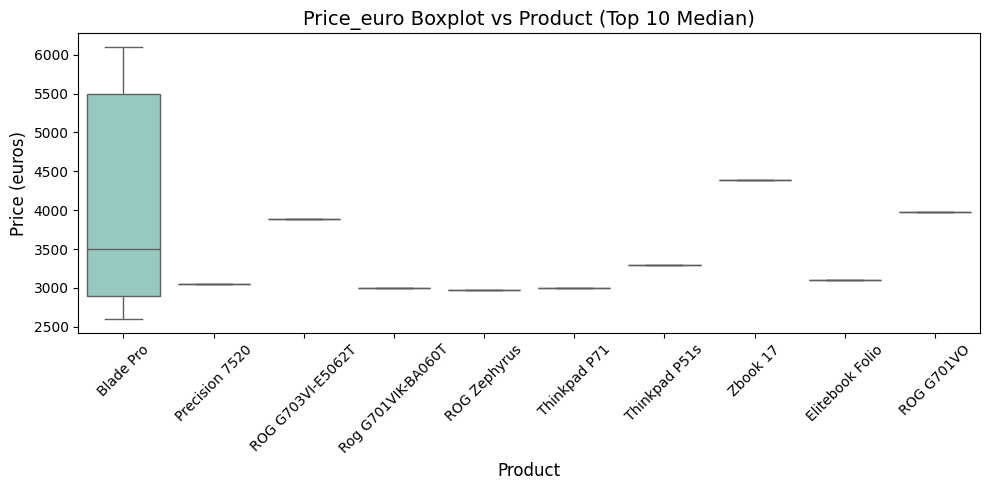

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


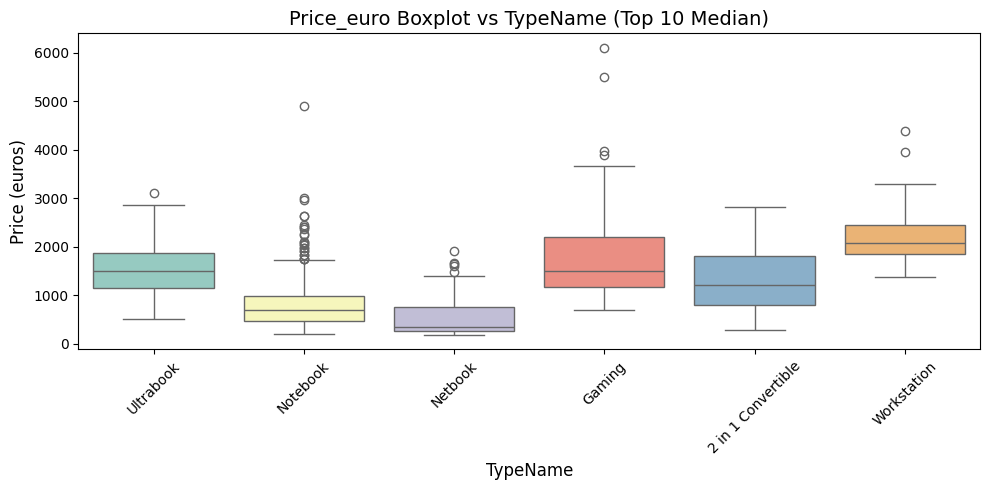

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


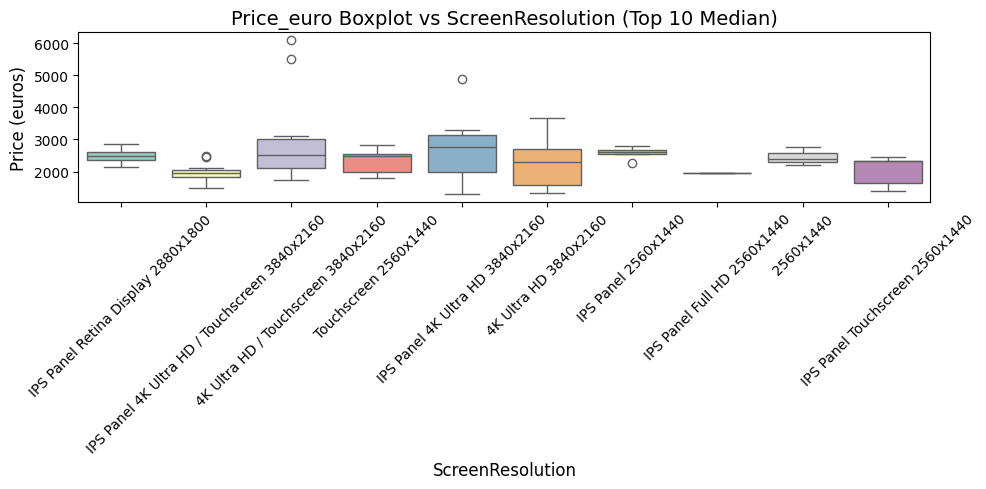

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


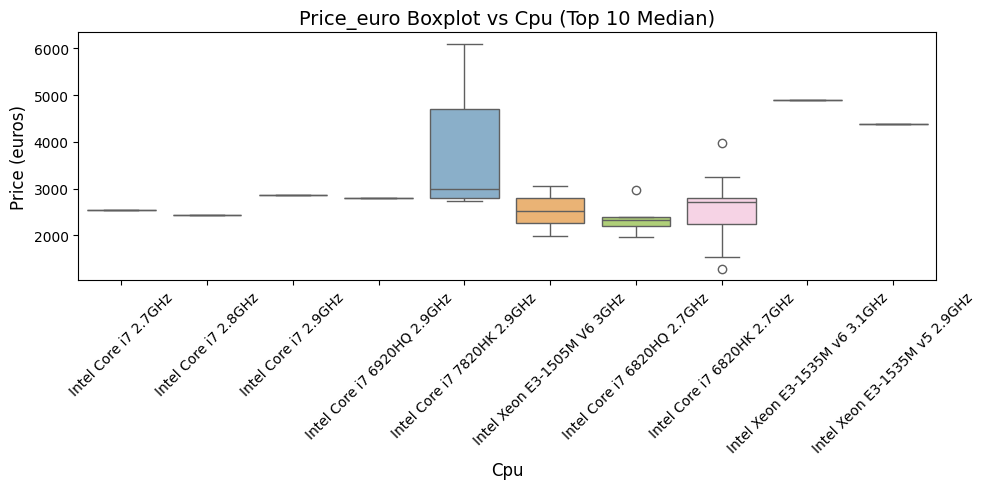

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


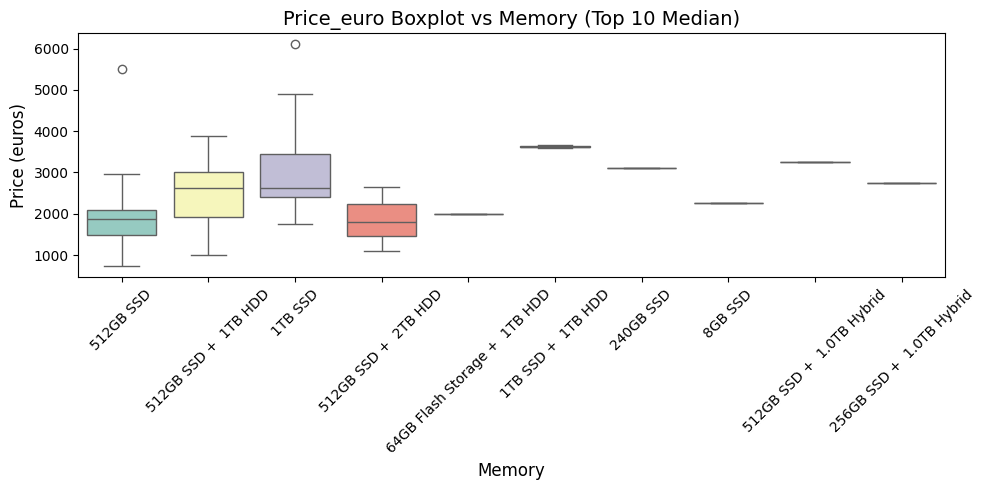

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


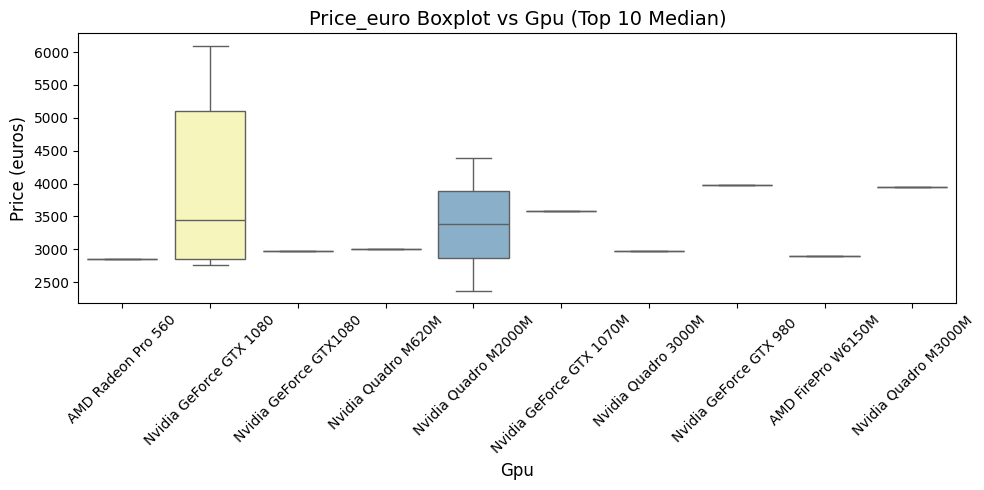

/tmp/ipython-input-2365770896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')


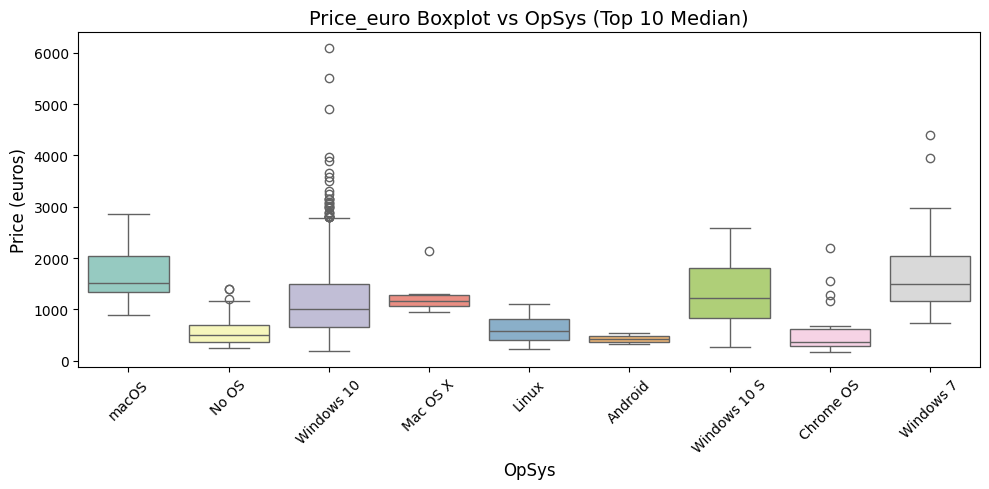

In [132]:
# Categorical Feature Analysis (in graphical form)
# Check the Category Frequency in graphic form (check which values ​​rarely appear, if in numerical form they can be called outliers)

# Show Top 10 categories by median price
top_n = 10

for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # Calculate the median price per category
    medians = df.groupby(col)['Price_euros'].median().sort_values(ascending=False).head(top_n).index

    sns.boxplot(data=df[df[col].isin(medians)], x=col, y='Price_euros', palette='Set3')
    plt.title(f'Price_euro Boxplot vs {col} (Top {top_n} Median)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price (euros)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Handling Outlier**

In [133]:
# Remove outliers only in the target column 'Price Euros' (removed to avoid bias, if only handled, I'm afraid the model will still be less accurate because this is a target feature)
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new dataframe without outliers
df_cleaned = df[(df['Price_euros'] >= lower_bound) & (df['Price_euros'] <= upper_bound)]

print(f"The amount of data after removing outliers in the target: {df.shape[0]}")


The amount of data after removing outliers in the target: 1303


## **Correlation Features**

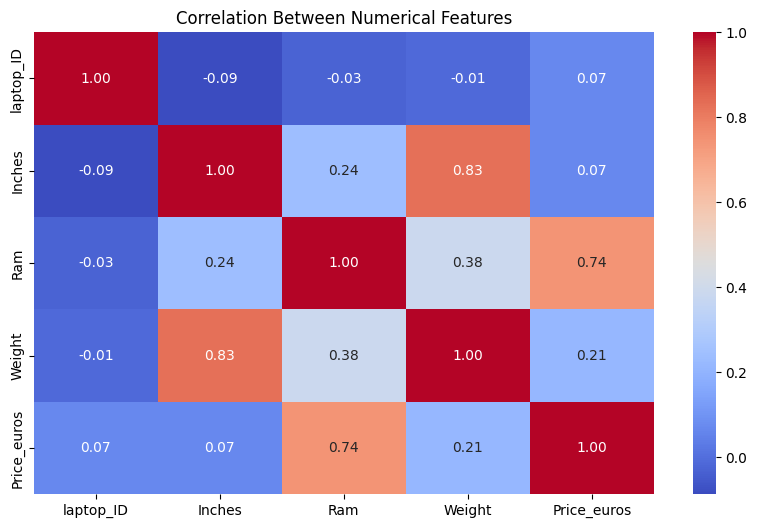

In [134]:
# see the linear relationship between numeric features in a dataset.
# The correlation should be later or not because later we will see the relationship with the target but that will be after feature engineering
# then also later we will be wild correlation with categorical
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()

- RAM shows a fairly strong positive correlation with Price_euros (0.74). <br>The larger the RAM capacity, the higher the laptop price. RAM is one of the main factors influencing price.

- Inches and Weight have a very high correlation (0.83).<br> This is logical, as laptops with larger screens generally also weigh more. However, the direct correlation between Inches and Price (0.07) is quite small, meaning that screen size alone does not significantly influence price.

- Weight has a low correlation with Price_euros (0.21).<br> Laptop weight does not directly determine price, although it is slightly related. It is likely influenced by the laptop's segmentation (e.g., premium ultrabook vs. gaming workstation).

- Inches and Price_euros have only a very weak correlation (0.07).<br> This indicates that screen size is not a major factor in determining price, compared to RAM.

# **FEATURES ENGINEERING**

In [135]:
# Display the number of unique categories on the categorical feature

for col in categorical_cols:
    print(f"{col} - Number of unique categories: {df[col].nunique()}")
    print(df[col].value_counts().head(), '\n')

Company - Number of unique categories: 19
Company
Dell      297
Lenovo    297
HP        274
Asus      158
Acer      103
Name: count, dtype: int64 

Product - Number of unique categories: 618
Product
XPS 13                30
Inspiron 3567         29
250 G6                21
Vostro 3568           19
Legion Y520-15IKBN    19
Name: count, dtype: int64 

TypeName - Number of unique categories: 6
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Name: count, dtype: int64 

ScreenResolution - Number of unique categories: 40
ScreenResolution
Full HD 1920x1080                            507
1366x768                                     281
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     53
Full HD / Touchscreen 1920x1080               47
Name: count, dtype: int64 

Cpu - Number of unique categories: 118
Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ

## **Feature Extraction**

In [136]:
# Feature Engineering —  Storage_Type
# creating a new feature because memory is too complex, so we made it simple "so we can predict what type of memory the laptop uses"
import re

def storage_type(memory):
    if 'SSD' in memory and 'HDD' in memory:
        return 'Hybrid'
    elif 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    else:
        return 'Unknown'

df_cleaned['Storage_Type'] = df_cleaned['Memory'].apply(storage_type)



/tmp/ipython-input-2878668731.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Storage_Type'] = df_cleaned['Memory'].apply(storage_type)


In [137]:
# Feature Engineering —  Storage_Size
# to see the size and generalization into GB

def extract_storage_size(memory):
    match = re.search(r'(\d+)(GB|TB)', memory)
    if match:
        size = int(match.group(1))
        unit = match.group(2)
        if unit == 'TB':
            size = size * 1024
        return size
    return None

df_cleaned['Storage_Size_GB'] = df_cleaned['Memory'].apply(extract_storage_size)

print(df_cleaned[['Memory', 'Storage_Size_GB']].head())


                Memory  Storage_Size_GB
0            128GB SSD              128
1  128GB Flash Storage              128
2            256GB SSD              256
3            512GB SSD              512
4            256GB SSD              256


/tmp/ipython-input-3417802447.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Storage_Size_GB'] = df_cleaned['Memory'].apply(extract_storage_size)


In [138]:
# Feature Engineering — Price_Category
# so it's easy to group the values ​​that are a bit far apart

def categorize_price(price):
    if price <= 800:
        return 'Low'
    elif price <= 1500:
        return 'Medium'
    else:
        return 'High'

df_cleaned['Price_Category'] = df_cleaned['Price_euros'].apply(categorize_price)


/tmp/ipython-input-3888336674.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price_Category'] = df_cleaned['Price_euros'].apply(categorize_price)


In [139]:
# Feature Engineering — Resolution_Pixels
# This simplifies the previous categorical to numeric by simply combining the resolutions.
import re

def extract_resolution(text):
    if 'x' in text:
        match = re.search(r'(\d+)x(\d+)', text)
        if match:
            return int(match.group(1)) * int(match.group(2))
    return None

df_cleaned['Resolution_Pixels'] = df_cleaned['ScreenResolution'].apply(extract_resolution)



/tmp/ipython-input-3109997551.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Resolution_Pixels'] = df_cleaned['ScreenResolution'].apply(extract_resolution)


In [140]:
# Feature Engineering — CPU_Speed_GHz
# make it focus on the CPU speed only

def extract_cpu_speed(text):
    match = re.search(r'(\d+\.\d+)GHz', text)
    if match:
        return float(match.group(1))
    return None

df_cleaned['CPU_Speed_GHz'] = df_cleaned['Cpu'].apply(extract_cpu_speed)


/tmp/ipython-input-3814345311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CPU_Speed_GHz'] = df_cleaned['Cpu'].apply(extract_cpu_speed)


In [141]:
# Feature Engineering —  GPU Vendor
# to group them so that it is clear so that the price differences are also clear

def extract_gpu_vendor(gpu_name):
    gpu_name = gpu_name.lower()
    if 'nvidia' in gpu_name:
        return 'Nvidia'
    elif 'amd' in gpu_name:
        return 'AMD'
    elif 'intel' in gpu_name:
        return 'Intel'
    else:
        return 'Other'

df_cleaned['GPU_Vendor'] = df_cleaned['Gpu'].apply(extract_gpu_vendor)

print(df_cleaned['GPU_Vendor'].value_counts())


GPU_Vendor
Intel     720
Nvidia    375
AMD       178
Other       1
Name: count, dtype: int64


/tmp/ipython-input-3620999001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GPU_Vendor'] = df_cleaned['Gpu'].apply(extract_gpu_vendor)


In [142]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_ID          1274 non-null   int64  
 1   Company            1274 non-null   object 
 2   Product            1274 non-null   object 
 3   TypeName           1274 non-null   object 
 4   Inches             1274 non-null   float64
 5   ScreenResolution   1274 non-null   object 
 6   Cpu                1274 non-null   object 
 7   Ram                1274 non-null   int64  
 8   Memory             1274 non-null   object 
 9   Gpu                1274 non-null   object 
 10  OpSys              1274 non-null   object 
 11  Weight             1274 non-null   float64
 12  Price_euros        1274 non-null   float64
 13  Storage_Type       1274 non-null   object 
 14  Storage_Size_GB    1274 non-null   int64  
 15  Price_Category     1274 non-null   object 
 16  Resolution_Pixels  1274 non-n

In [143]:
# Drop columns that are already represented by new features

columns_to_drop = ['ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Product', 'laptop_ID']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

print(f"Shape data after dropping irrelevant columns: {df_cleaned.shape}")


Shape data after dropping irrelevant columns: (1274, 13)


## **Feature Encoding**

In [144]:
# One-hot encoding
categorical_features = ['Company', 'TypeName', 'OpSys', 'Storage_Type', 'Price_Category', 'GPU_Vendor']

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)


In [145]:
df_encoded.head()
print("Shape data setelah encoding:", df_encoded.shape)

Shape data setelah encoding: (1274, 46)


In [146]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Inches                 1274 non-null   float64
 1   Ram                    1274 non-null   int64  
 2   Weight                 1274 non-null   float64
 3   Price_euros            1274 non-null   float64
 4   Storage_Size_GB        1274 non-null   int64  
 5   Resolution_Pixels      1274 non-null   int64  
 6   CPU_Speed_GHz          1189 non-null   float64
 7   Company_Apple          1274 non-null   bool   
 8   Company_Asus           1274 non-null   bool   
 9   Company_Chuwi          1274 non-null   bool   
 10  Company_Dell           1274 non-null   bool   
 11  Company_Fujitsu        1274 non-null   bool   
 12  Company_Google         1274 non-null   bool   
 13  Company_HP             1274 non-null   bool   
 14  Company_Huawei         1274 non-null   bool   
 15  Company_L

In [147]:
df_encoded.isna().sum()

Inches                    0
Ram                       0
Weight                    0
Price_euros               0
Storage_Size_GB           0
Resolution_Pixels         0
CPU_Speed_GHz            85
Company_Apple             0
Company_Asus              0
Company_Chuwi             0
Company_Dell              0
Company_Fujitsu           0
Company_Google            0
Company_HP                0
Company_Huawei            0
Company_LG                0
Company_Lenovo            0
Company_MSI               0
Company_Mediacom          0
Company_Microsoft         0
Company_Razer             0
Company_Samsung           0
Company_Toshiba           0
Company_Vero              0
Company_Xiaomi            0
TypeName_Gaming           0
TypeName_Netbook          0
TypeName_Notebook         0
TypeName_Ultrabook        0
TypeName_Workstation      0
OpSys_Chrome OS           0
OpSys_Linux               0
OpSys_Mac OS X            0
OpSys_No OS               0
OpSys_Windows 10          0
OpSys_Windows 10 S        0
OpSys_Windows 7           0
OpSys_macOS               0
Storage_Type_Hybrid       0
Storage_Type_SSD          0
Storage_Type_Unknown      0
Price_Category_Low        0
Price_Category_Medium     0
GPU_Vendor_Intel          0
GPU_Vendor_Nvidia         0
GPU_Vendor_Other          0
dtype: int64

In [148]:
# Delete rows where CPU_Speed_GHz is NaN
df_encoded = df_encoded.dropna(subset=['CPU_Speed_GHz'])

print(df_encoded['CPU_Speed_GHz'].isna().sum())

0


## **SPLITTING**

In [149]:
# split features and targets
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']

In [150]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((951, 45), (238, 45), (951,), (238,))

## **SCALING FEATURE**

In [152]:
# outlier data standardization
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

num_cols = [
    'Inches',
    'Ram',
    'Storage_Size_GB',
    'Weight',
    'CPU_Speed_GHz',
    'Resolution_Pixels'
]

scaler = StandardScaler()

# Fit and transform only on numeric columns
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

# Perform scaling for the targets y_train and y_test
# Initialize scaler for target
scaler_y = MinMaxScaler()

# Fit only on y_train, transform on y_train and y_test
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# **MODELLING AND EVALUATION**

## **Linear Regression**

In [153]:
# Model initialization
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train_scaled, y_train_scaled)

# Perform Cross Validation (use X_train_scaled and y_train)
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train_scaled, cv=5, scoring='r2')

print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.6f}")


Cross Validation Scores: [0.9032074  0.90767237 0.89468348 0.87359712 0.90856091]
Mean CV Score: 0.897544


In [154]:
# Evaluation on Training Set
y_pred_train_lr = model_lr.predict(X_train_scaled)

mse_train_lr = mean_squared_error(y_train_scaled, y_pred_train_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
mae_train_lr = mean_absolute_error(y_train_scaled, y_pred_train_lr)
r2_train_lr = r2_score(y_train_scaled, y_pred_train_lr)

# Output of evaluation results on Training Set
print("Training Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_train_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_lr}")
print(f"Mean Absolute Error (MAE): {mae_train_lr}")
print(f"R-squared (R2): {r2_train_lr}")

Training Set Evaluation:
Mean Squared Error (MSE): 0.004542147548224353
Root Mean Squared Error (RMSE): 0.06739545643605623
Mean Absolute Error (MAE): 0.05144124566315576
R-squared (R2): 0.9088029221203751


In [155]:
# Prediction
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test_scaled, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test_scaled, y_pred_lr)
r2_lr = r2_score(y_test_scaled, y_pred_lr)

# Evaluation results output
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared (R2): {r2_lr}")

Linear Regression:
Mean Squared Error (MSE): 0.006226653519643523
Root Mean Squared Error (RMSE): 0.07890914724950158
Mean Absolute Error (MAE): 0.061491443767882695
R-squared (R2): 0.8860064481893432


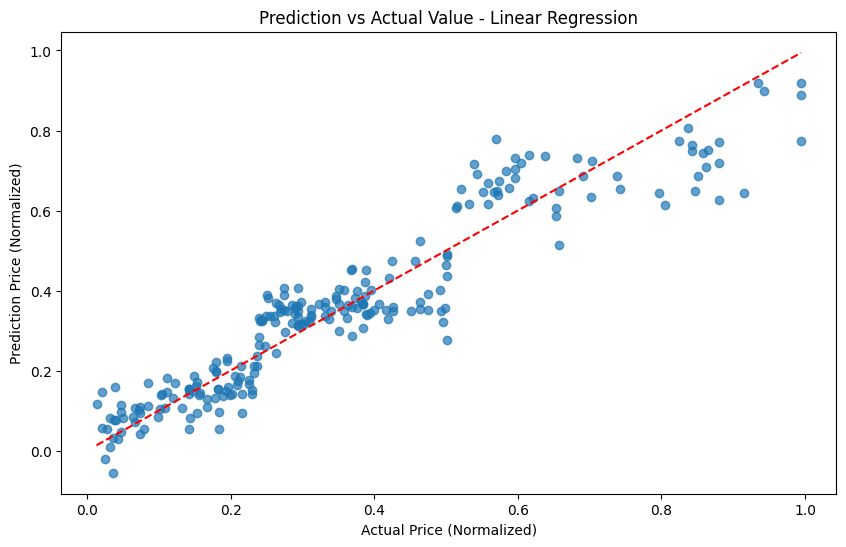

In [156]:
# Visualization of predicted vs actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_lr, alpha=0.7)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'r--')
plt.xlabel('Actual Price (Normalized)')
plt.ylabel('Prediction Price (Normalized)')
plt.title('Prediction vs Actual Value - Linear Regression')
plt.show()

## **Decision Tree**

In [157]:
# Model initialization
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model
model_dt.fit(X_train_scaled, y_train_scaled)

# Perform Cross Validation
cv_scores_dt = cross_val_score(model_dt, X_train_scaled, y_train_scaled, cv=5, scoring='r2')

print(f"Cross Validation Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean():.6f}")



Cross Validation Scores: [0.86654593 0.84412177 0.82802874 0.85867277 0.85515894]
Mean CV Score: 0.850506


In [158]:
# Evaluation on Training Set
y_pred_train_dt = model_dt.predict(X_train_scaled)
mse_train_dt = mean_squared_error(y_train_scaled, y_pred_train_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
mae_train_dt = mean_absolute_error(y_train_scaled, y_pred_train_dt)
r2_train_dt = r2_score(y_train_scaled, y_pred_train_dt)

print("\nTraining Set Evaluation (Decision Tree):")
print(f"Mean Squared Error (MSE): {mse_train_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_dt}")
print(f"Mean Absolute Error (MAE): {mae_train_dt}")
print(f"R-squared (R2): {r2_train_dt}")




Training Set Evaluation (Decision Tree):
Mean Squared Error (MSE): 0.0001270762912712981
Root Mean Squared Error (RMSE): 0.011272812039207346
Mean Absolute Error (MAE): 0.0026315968553114024
R-squared (R2): 0.9974485667168049


In [159]:
# Evaluation on Testing Set
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test_scaled, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test_scaled, y_pred_dt)
r2_dt = r2_score(y_test_scaled, y_pred_dt)

print("\nTesting Set Evaluation (Decision Tree):")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R2): {r2_dt}")


Testing Set Evaluation (Decision Tree):
Mean Squared Error (MSE): 0.007464913308670685
Root Mean Squared Error (RMSE): 0.08639972979512543
Mean Absolute Error (MAE): 0.06152064310902882
R-squared (R2): 0.8633371875712251


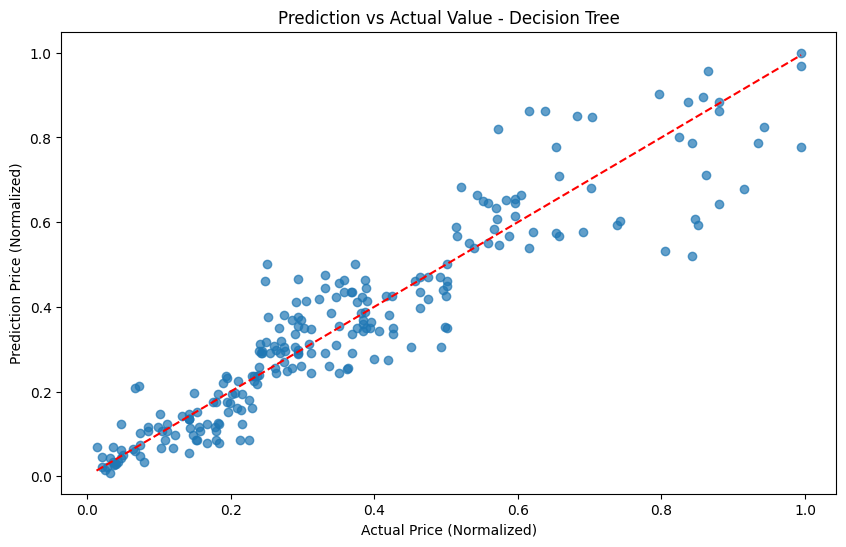

In [160]:
# Visualization of Decision Tree prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_dt, alpha=0.7)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'r--')
plt.xlabel('Actual Price (Normalized)')
plt.ylabel('Prediction Price (Normalized)')
plt.title('Prediction vs Actual Value - Decision Tree')
plt.show()

## **Random Forest**

In [161]:
# Model initialization
model_rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
model_rf.fit(X_train_scaled, y_train_scaled)

# Perform Cross Validation
cv_scores_rf = cross_val_score(model_rf, X_train_scaled, y_train_scaled, cv=5, scoring='r2')

print(f"Cross Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean():.6f}")



Cross Validation Scores: [0.92272659 0.91712317 0.90939921 0.8958606  0.89632711]
Mean CV Score: 0.908287


In [162]:
# Evaluation on Training Set
y_pred_train_rf = model_rf.predict(X_train_scaled)
mse_train_rf = mean_squared_error(y_train_scaled, y_pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train_scaled, y_pred_train_rf)
r2_train_rf = r2_score(y_train_scaled, y_pred_train_rf)

print("\nTraining Set Evaluation (Random Forest):")
print(f"Mean Squared Error (MSE): {mse_train_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf}")
print(f"Mean Absolute Error (MAE): {mae_train_rf}")
print(f"R-squared (R2): {r2_train_rf}")




Training Set Evaluation (Random Forest):
Mean Squared Error (MSE): 0.0007004405585763358
Root Mean Squared Error (RMSE): 0.026465837575567787
Mean Absolute Error (MAE): 0.018714008439553714
R-squared (R2): 0.9859365792299051


In [163]:
# Evaluation on Testing Set
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test_scaled, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_scaled, y_pred_rf)
r2_rf = r2_score(y_test_scaled, y_pred_rf)

print("\nTesting Set Evaluation (Random Forest):")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")


Testing Set Evaluation (Random Forest):
Mean Squared Error (MSE): 0.005146084728274344
Root Mean Squared Error (RMSE): 0.0717362162946607
Mean Absolute Error (MAE): 0.05344908861344202
R-squared (R2): 0.9057888038504259


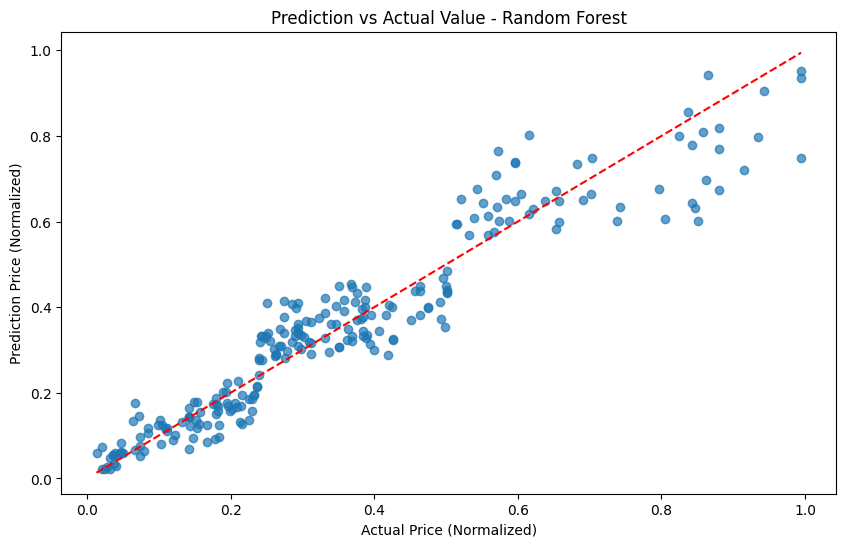

In [164]:
# Visualization of Random Forest prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_rf, alpha=0.7)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'r--')
plt.xlabel('Actual Price (Normalized)')
plt.ylabel('Prediction Price (Normalized)')
plt.title('Prediction vs Actual Value - Random Forest')
plt.show()

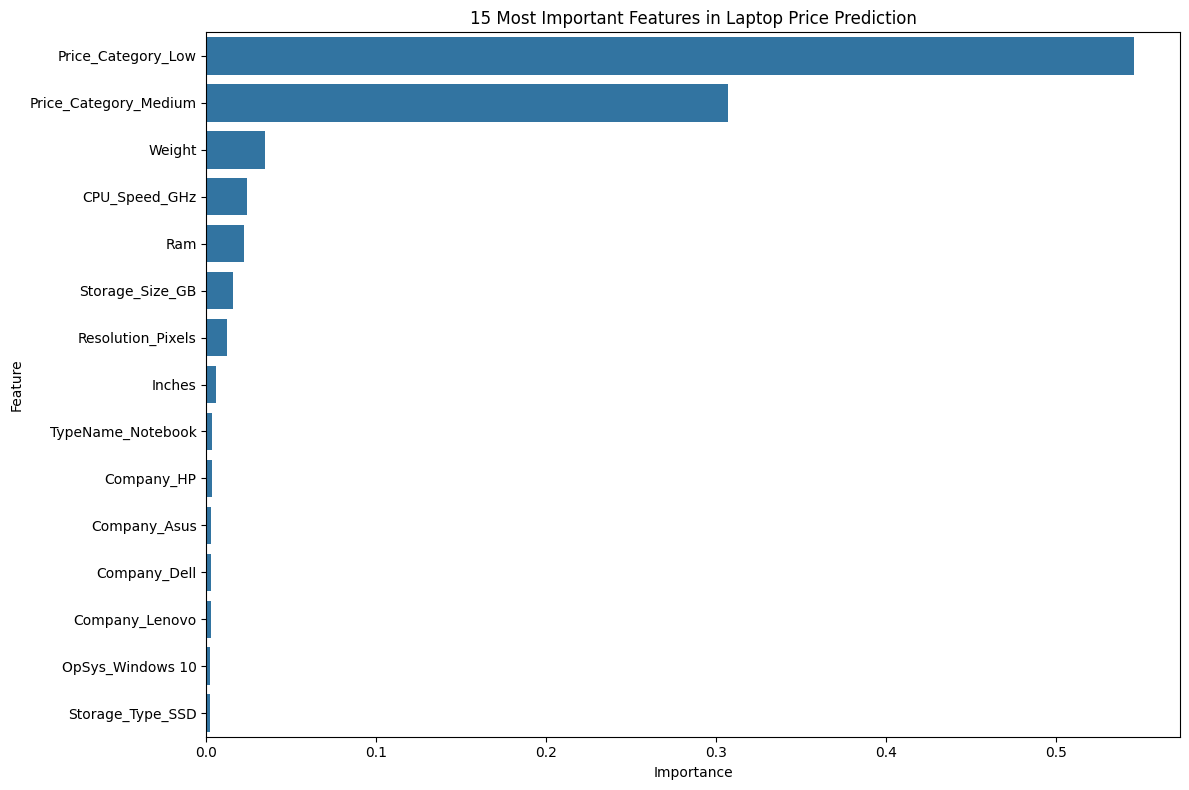

In [165]:
# Feature importance analysis of Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualization of feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('15 Most Important Features in Laptop Price Prediction')
plt.tight_layout()
plt.show()

In [166]:
# Performing cross-validation
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='r2')

# display results
print(f"Cross Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean():.6f}")

Cross Validation Scores: [0.90378964 0.90393599 0.91789735 0.88435173 0.90792002]
Mean CV Score: 0.903579
